In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['figure.facecolor'] = 'papayawhip'
pd.options.display.max_columns = None
from scipy.stats import chi2_contingency,chisquare
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from warnings import filterwarnings
filterwarnings('ignore')

from pandas_profiling import ProfileReport
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

# Education
1 Never attended school or only kindergarten 
2 Grades 1 through 8 (Elementary) 
3 Grades 9 through 11 (Some high school) 
4 Grade 12 or GED (High school graduate) 
5 College 1 year to 3 years (Some college or technical school) 
6 College 4 years or more (College graduate) 
9 Refused 

# Income
1 Less than $10,000
2 Less than $15,000 ($10,000 to less than $15,000)
3 Less than $20,000 ($15,000 to less than $20,000)
4 Less than $25,000 ($20,000 to less than $25,000)
5 Less than $35,000 ($25,000 to less than $35,000)
6 Less than $50,000 ($35,000 to less than $50,000)
7 Less than $75,000 ($50,000 to less than $75,000)
8 $75,000 or more
77 Don’t know/Not sure
99 Refused 

'EXERANY2' - 
'_AGE_G' - age in 6 cat
'HTMK' - height in M
'WTKG3' - weight in kg
'_BMI5' - bmi
'_BMI5CAT' - in cat
'_RFDRHV5' - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
'HLTHPLN1' - health coverage

# Age
1 Age 18 to 24
2 Age 25 to 29
Notes: 25 <= AGE <= 29

3 Age 30 to 34
Notes: 30 <= AGE <= 34

4 Age 35 to 39
Notes: 35 <= AGE <= 39

5 Age 40 to 44
Notes: 40 <= AGE <= 44

6 Age 45 to 49
Notes: 45 <= AGE <= 49

7 Age 50 to 54
Notes: 50 <= AGE <= 54

8 Age 55 to 59
Notes: 55 <= AGE <= 59

9 Age 60 to 64
Notes: 60 <= AGE <= 64

10 Age 65 to 69
Notes: 65 <= AGE <= 69

11 Age 70 to 74
Notes: 70 <= AGE <= 74

12 Age 75 to 79
Notes: 75 <= AGE <= 79

13 Age 80 or older
Notes: 80 <= AGE <= 99

14 Don’t know/Refused/Missing
Notes: 7 <= AGE <= 9


# DataSet

In [3]:
dia_o = pd.read_csv(r"S:\GitHub Projects\Using Telephonic Survey Questions to predict Diabetes Risk using Supervised Machine Learning models\Capstone (2)\Datasets\diabetes_binary_health_indicators_BRFSS2015.csv")
dia_o.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [4]:
dia = dia_o.copy()
dia_0 = dia[dia.Diabetes_binary == 0].copy()
dia_1 = dia[dia.Diabetes_binary == 1].copy()
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [168]:
ProfileReport(dia)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
len(dia[dia.duplicated(keep='first')])

24206

In [6]:
(dia_o.drop(['PhysHlth','MentHlth','BMI'],axis=1).astype('object').describe()).T

count  unique  top      freq
Diabetes_binary       253680.0     2.0  0.0  218334.0
HighBP                253680.0     2.0  0.0  144851.0
HighChol              253680.0     2.0  0.0  146089.0
CholCheck             253680.0     2.0  1.0  244210.0
Smoker                253680.0     2.0  0.0  141257.0
Stroke                253680.0     2.0  0.0  243388.0
HeartDiseaseorAttack  253680.0     2.0  0.0  229787.0
PhysActivity          253680.0     2.0  1.0  191920.0
Fruits                253680.0     2.0  1.0  160898.0
Veggies               253680.0     2.0  1.0  205841.0
HvyAlcoholConsump     253680.0     2.0  0.0  239424.0
AnyHealthcare         253680.0     2.0  1.0  241263.0
NoDocbcCost           253680.0     2.0  0.0  232326.0
GenHlth               253680.0     5.0  2.0   89084.0
DiffWalk              253680.0     2.0  0.0  211005.0
Sex                   253680.0     2.0  0.0  141974.0
Age                   253680.0    13.0  9.0   33244.0
Education             253680.0     6.0  6.0  107325.0
Income                253680.0     8.0  8.0   90385.0

In [7]:
dia.drop_duplicates(keep='first',inplace=True)
dia.reset_index(drop=True,inplace=True)

In [8]:
dia.shape

(229474, 22)

In [9]:
dia_o[['PhysHlth','MentHlth','BMI']].describe().iloc[1:,:].style.background_gradient('Greens')

In [10]:
DF({'columns':dia.drop(['PhysHlth','MentHlth','BMI'],axis=1).columns})

columns
0        Diabetes_binary
1                 HighBP
2               HighChol
3              CholCheck
4                 Smoker
5                 Stroke
6   HeartDiseaseorAttack
7           PhysActivity
8                 Fruits
9                Veggies
10     HvyAlcoholConsump
11         AnyHealthcare
12           NoDocbcCost
13               GenHlth
14              DiffWalk
15                   Sex
16                   Age
17             Education
18                Income

In [11]:
dia.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

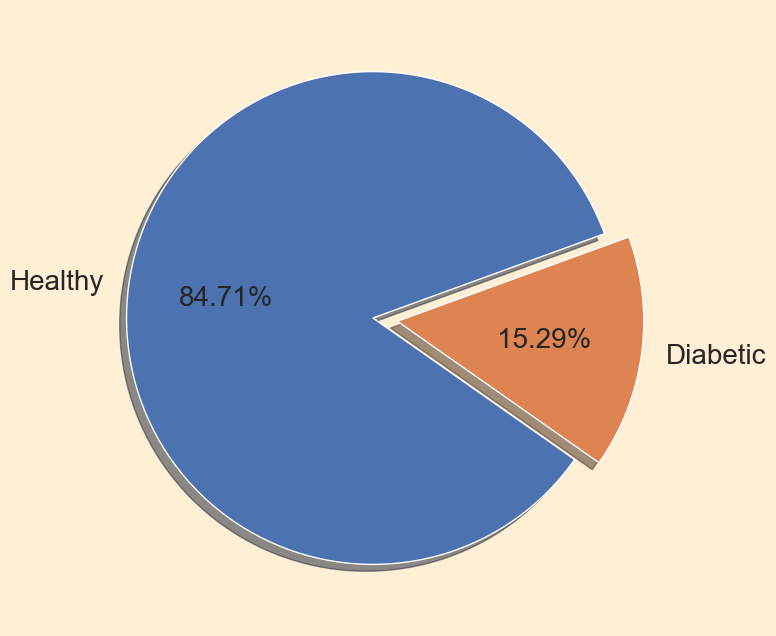

In [12]:
(dia.Diabetes_binary.value_counts(normalize=True)*100).plot.pie(autopct = '%.2f%%',explode = [0.0,0.1],labels=['Healthy','Diabetic'],startangle=20,fontsize=20,shadow=True)
plt.ylabel('');

In [13]:
dia.Diabetes_binary.value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

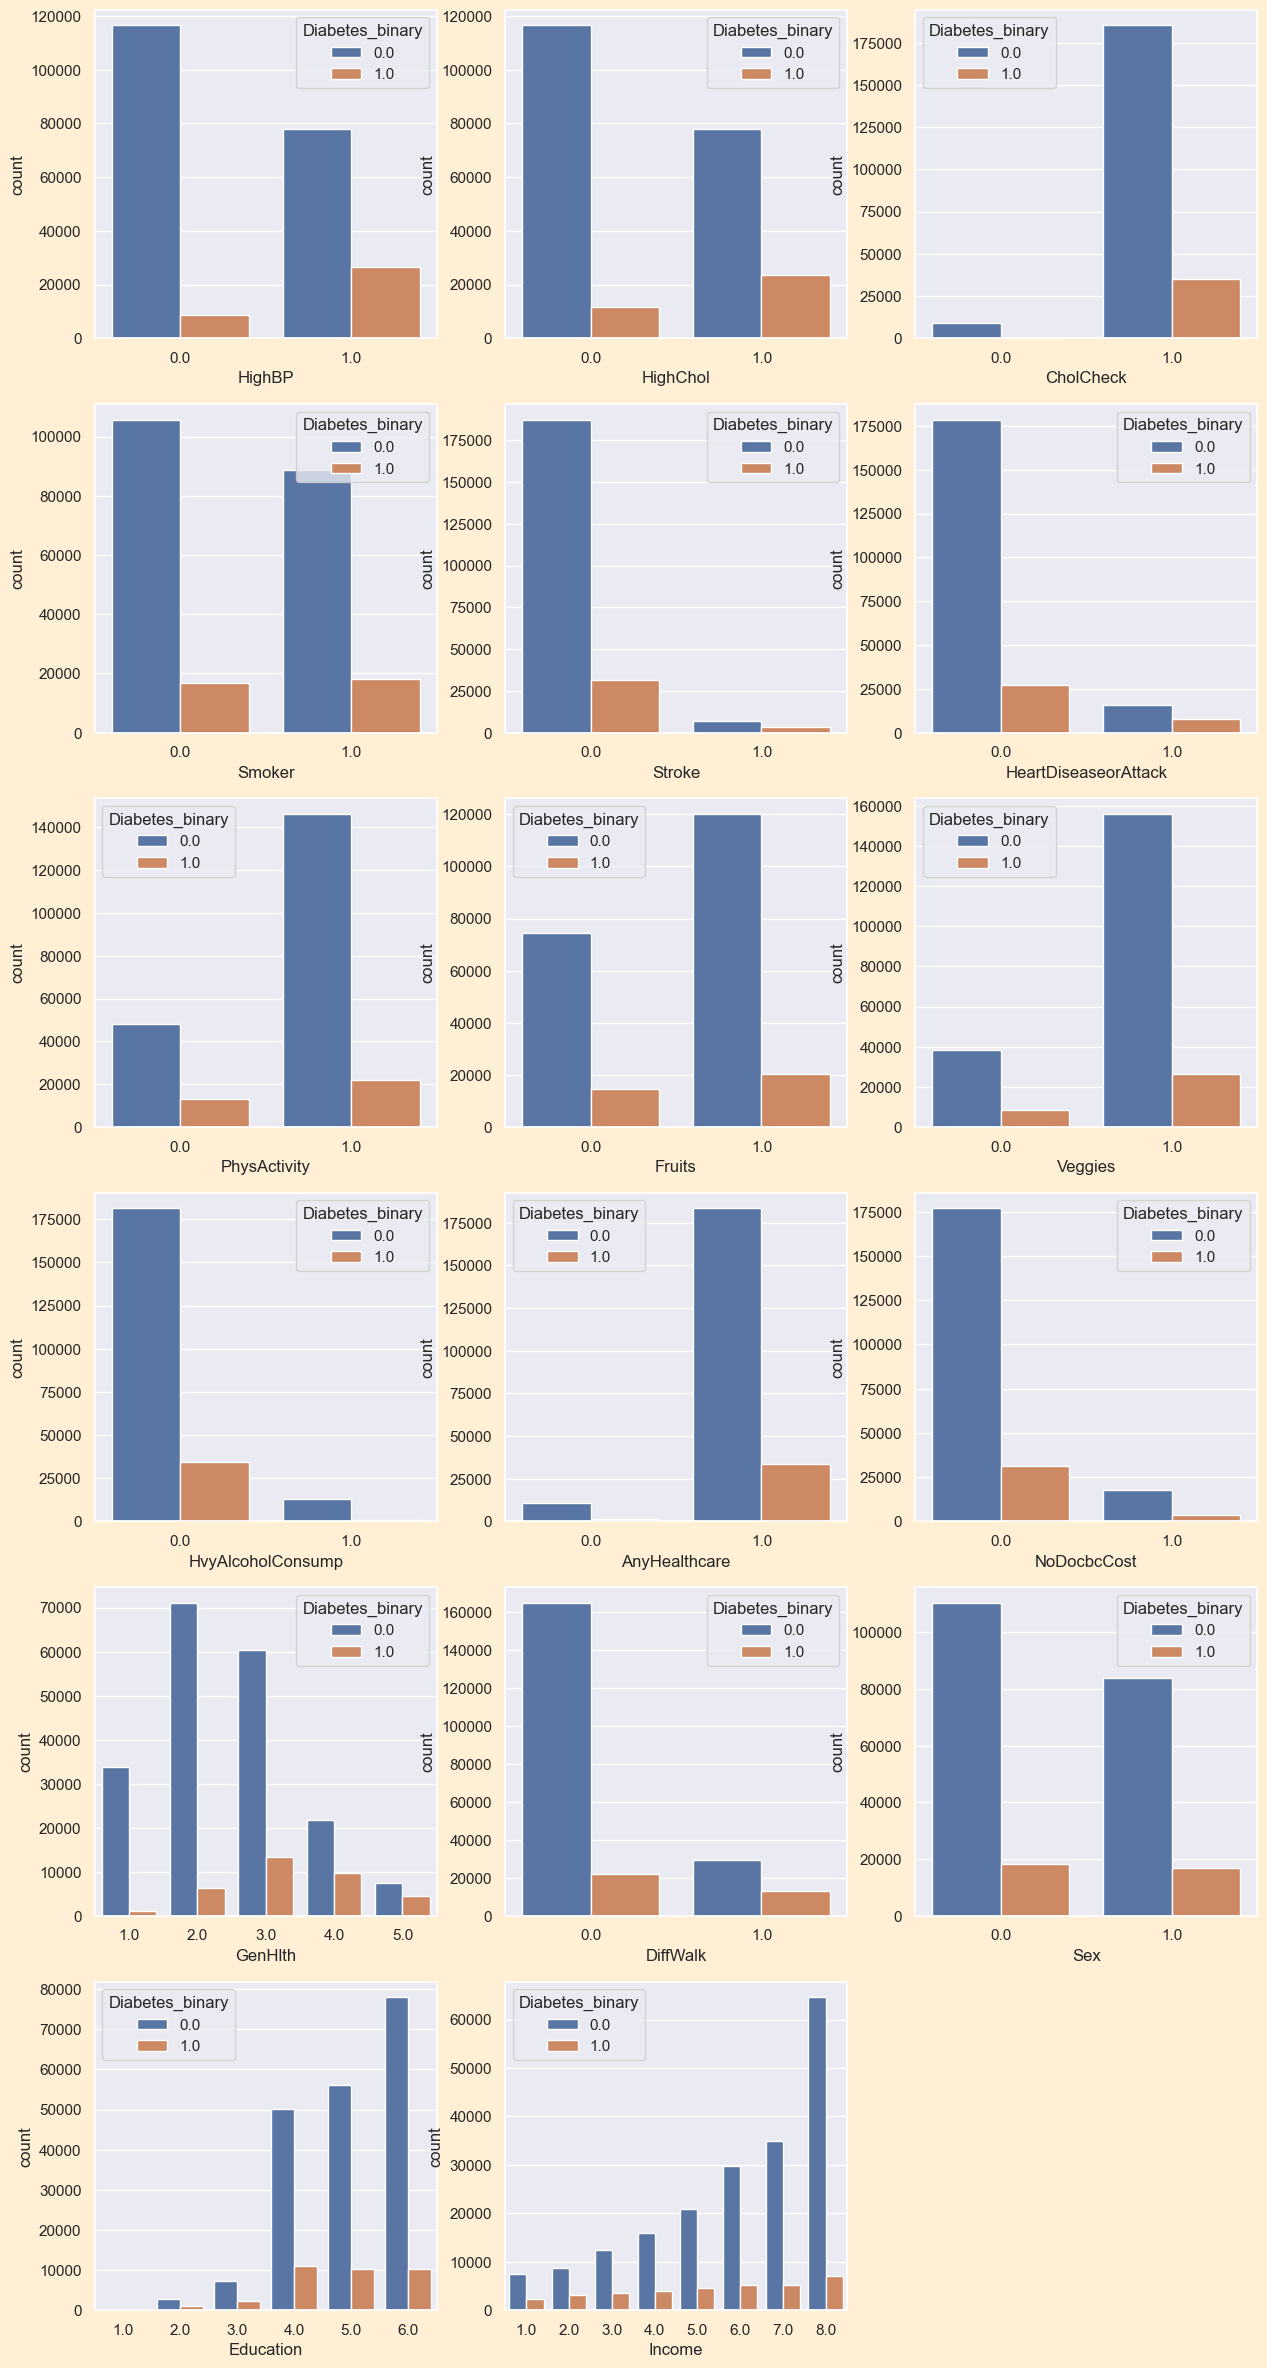

In [14]:
plt.subplots(figsize=(15,35))
p=1
for i in dia.drop(['Diabetes_binary','BMI','Age','PhysHlth','MentHlth'],axis=1).columns:
    plt.subplot(7,3,p)
    sns.countplot(x=i,data=dia,hue=dia.Diabetes_binary)
    
    p+=1;

In [15]:
# when data is highly imbalanced we got get unreliable interpretation

In [16]:
dia.groupby('Diabetes_binary').HighChol.value_counts(normalize=True)*100

Diabetes_binary  HighChol
0.0              0.0         59.949480
                 1.0         40.050520
1.0              1.0         66.945893
                 0.0         33.054107
Name: HighChol, dtype: float64

In [17]:
(pd.crosstab(dia.HighChol,dia.Diabetes_binary,normalize='index')*100)

Diabetes_binary        0.0        1.0
HighChol                             
0.0              90.945844   9.054156
1.0              76.815827  23.184173

## Precentage Visualization of columns

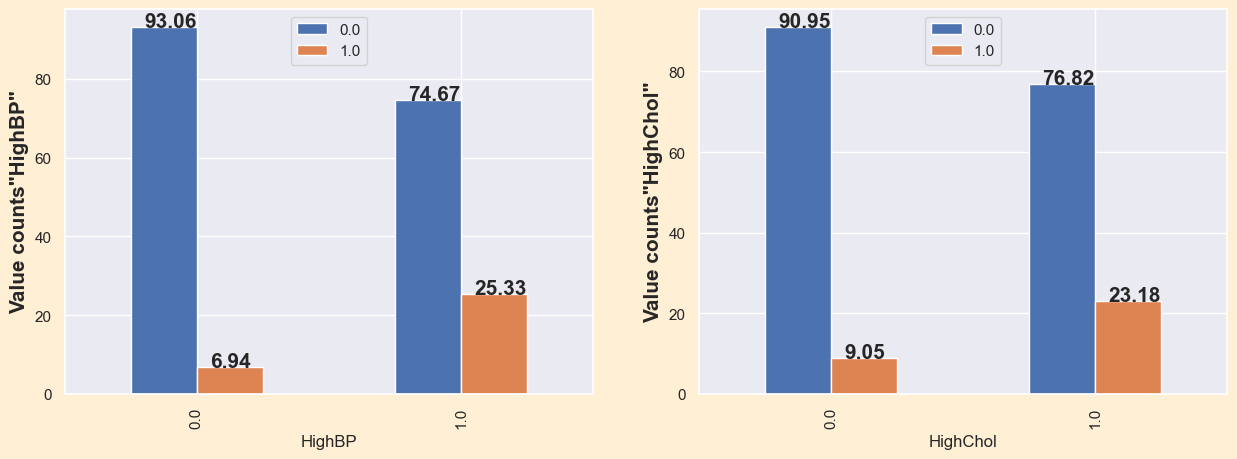

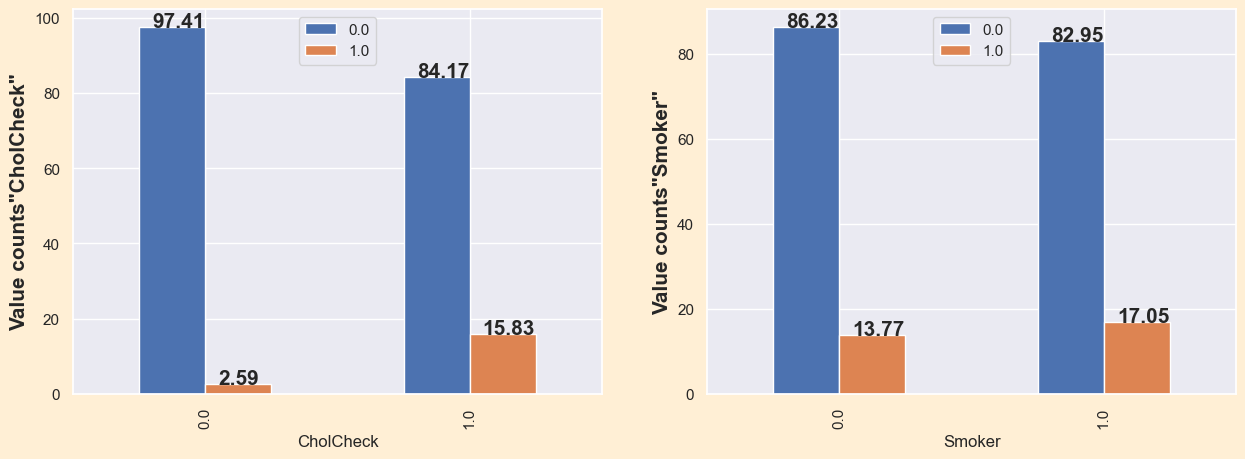

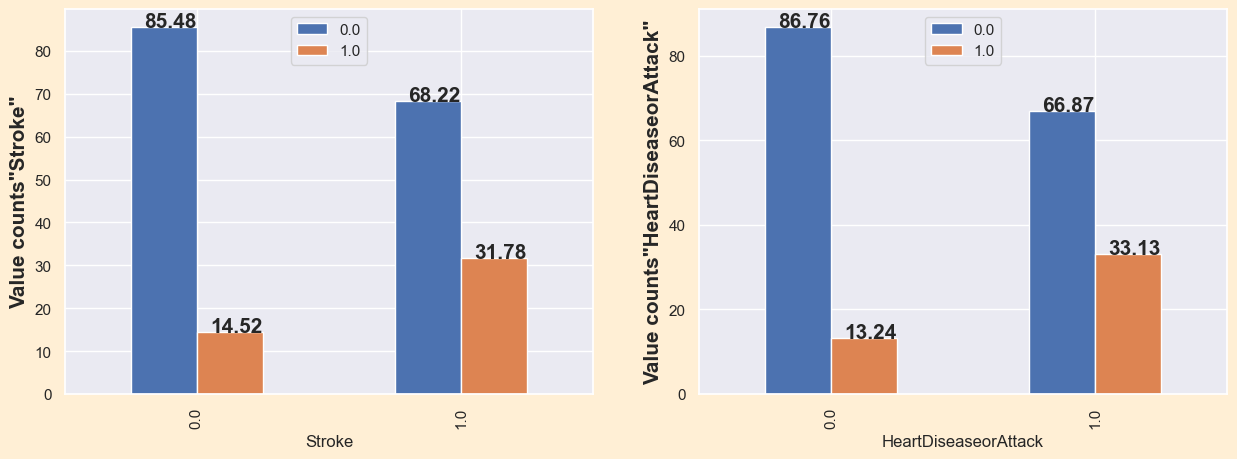

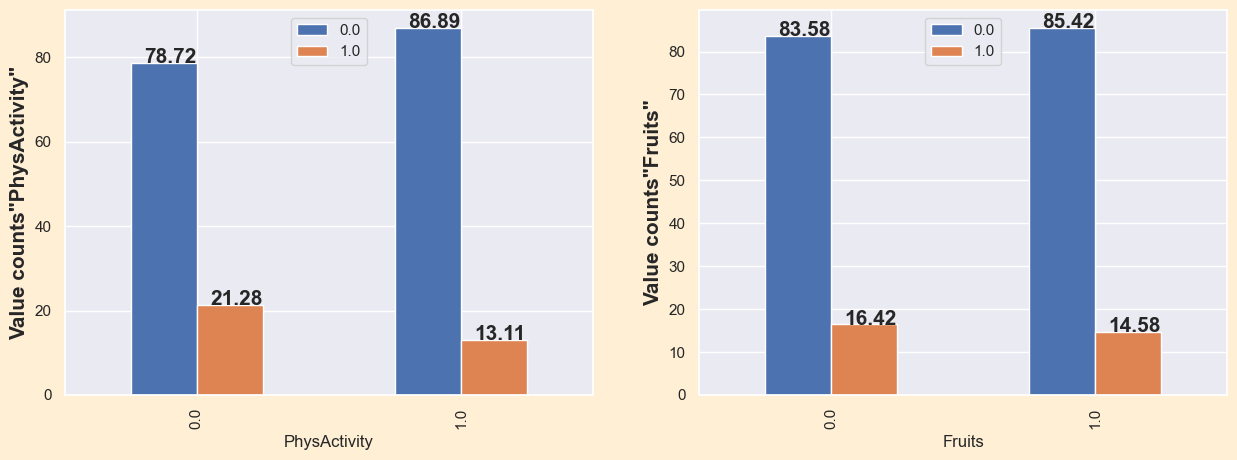

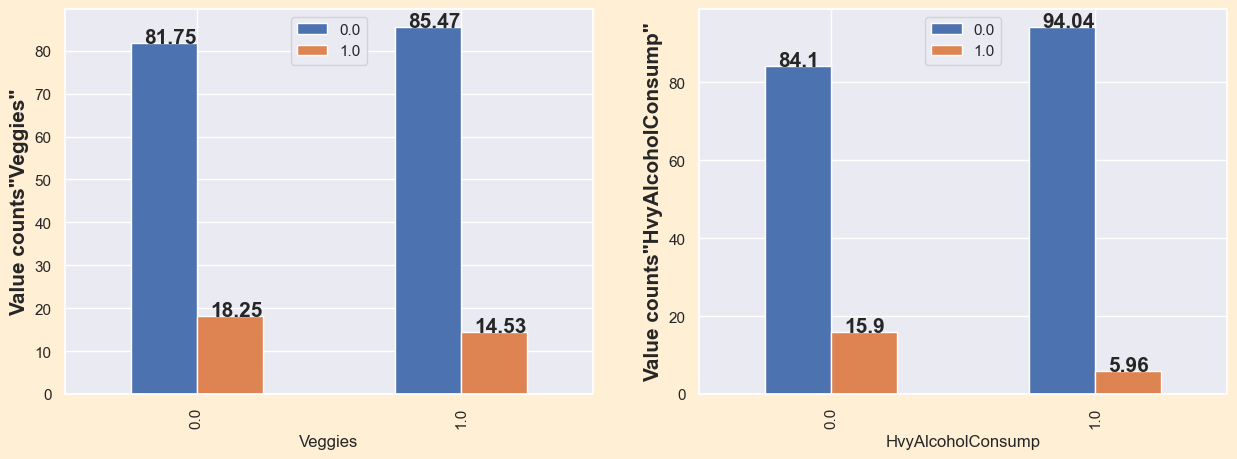

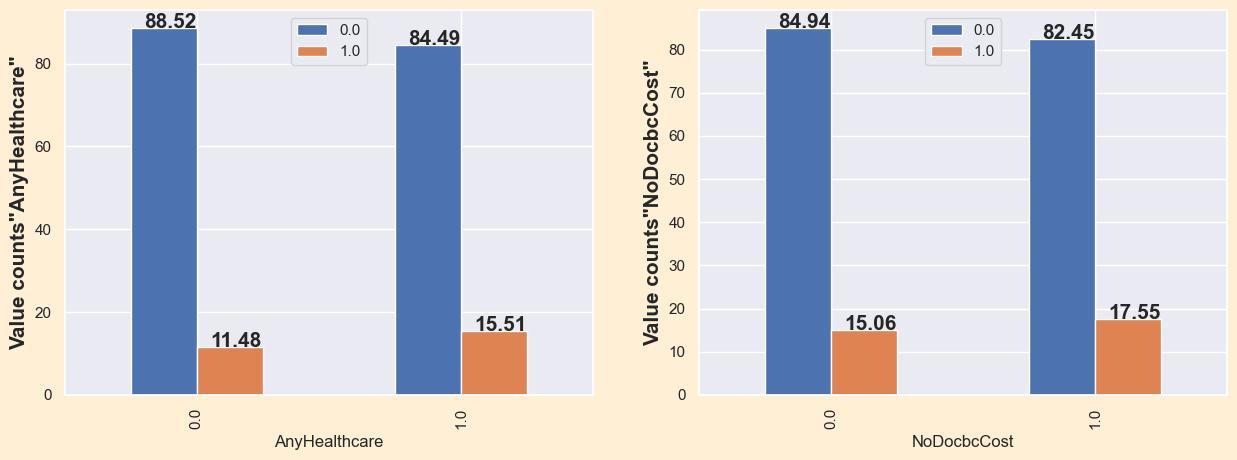

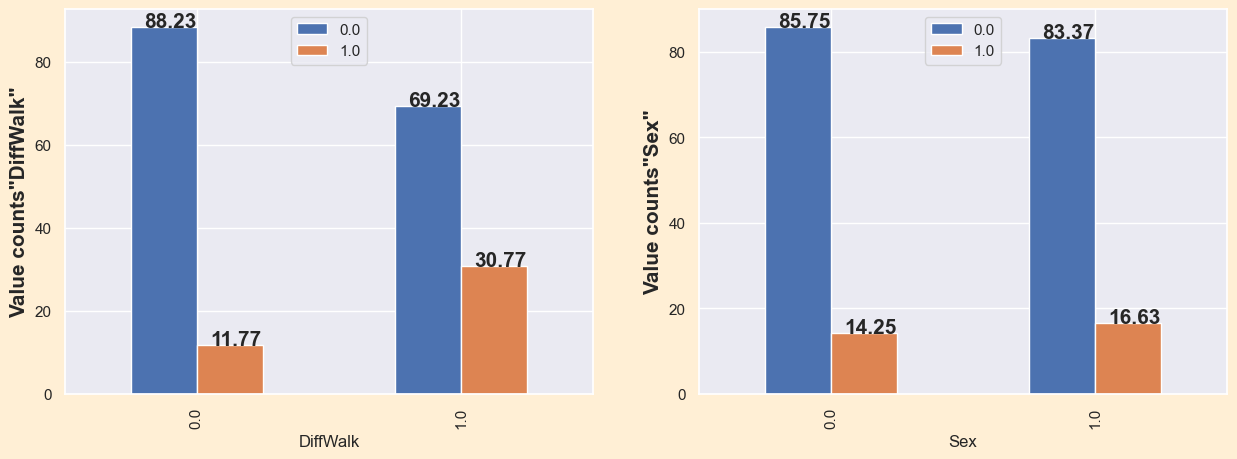

In [18]:
col = dia.drop(['Diabetes_binary','BMI','Age','PhysHlth','MentHlth','GenHlth','Education','Income'],axis=1).columns

for j in range(0,len(col),2):
    plt.subplots(figsize=(15,5))
    p=1
    for c in col[j:j+2]:
        ax = plt.subplot(1,2,p)
        t = round((pd.crosstab(dia[c],dia.Diabetes_binary,normalize='index')*100),2)
        t.plot.bar(ax=ax)
        plt.legend(loc='upper center')
        #plt.xlabel(,fontsize=15,fontweight='bold')
        plt.ylabel(f'Value counts"{c}"',fontsize=15,fontweight ='bold')
        for i in [0,1]:
            plt.text(i-0.2,t.iloc[i][0],str(t.iloc[i][0]),fontweight = 'bold',fontsize=15)
            plt.text(i+0.05,t.iloc[i][1],str(t.iloc[i][1]),fontweight = 'bold',fontsize=15)
        p+=1

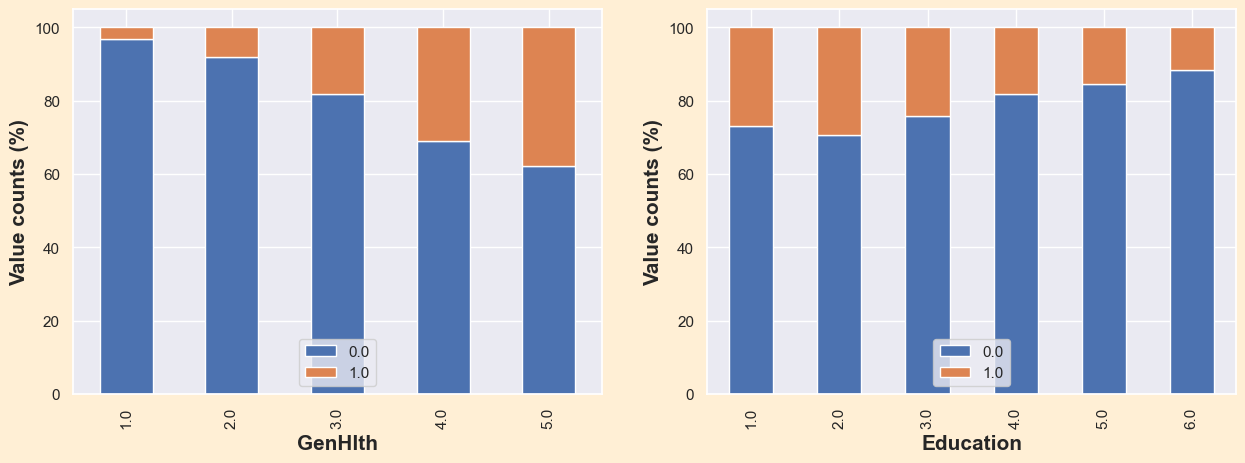

In [19]:
plt.subplots(figsize=(15,5))
p=1
for c in ['GenHlth','Education']:
    ax = plt.subplot(1,2,p)
    t = round((pd.crosstab(dia[c],dia.Diabetes_binary,normalize='index')*100),2)
    t.plot.bar(ax=ax,stacked=True)
    plt.legend(loc='lower center')
    plt.xlabel(c,fontsize=15,fontweight='bold')
    plt.ylabel('Value counts (%)',fontsize=15,fontweight ='bold')
    p+=1

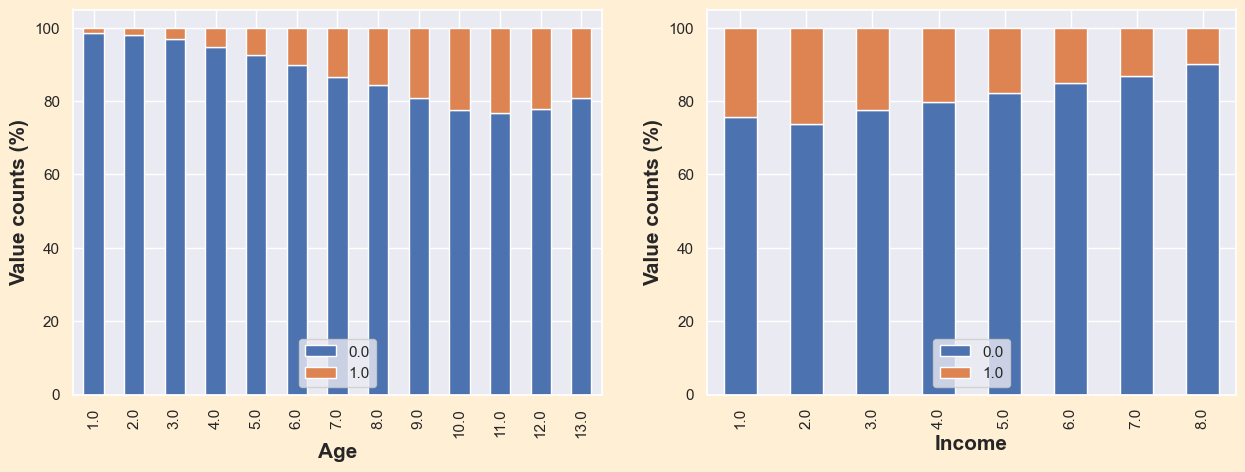

In [20]:
plt.subplots(figsize=(15,5))
p=1
for c in ['Age','Income']:
    ax = plt.subplot(1,2,p)
    t = round((pd.crosstab(dia[c],dia.Diabetes_binary,normalize='index')*100),2)
    t.plot.bar(ax=ax,stacked=True)
    plt.legend(loc='lower center')
    plt.xlabel(c,fontsize=15,fontweight='bold')
    plt.ylabel('Value counts (%)',fontsize=15,fontweight ='bold')
    p+=1

## Numerical Col

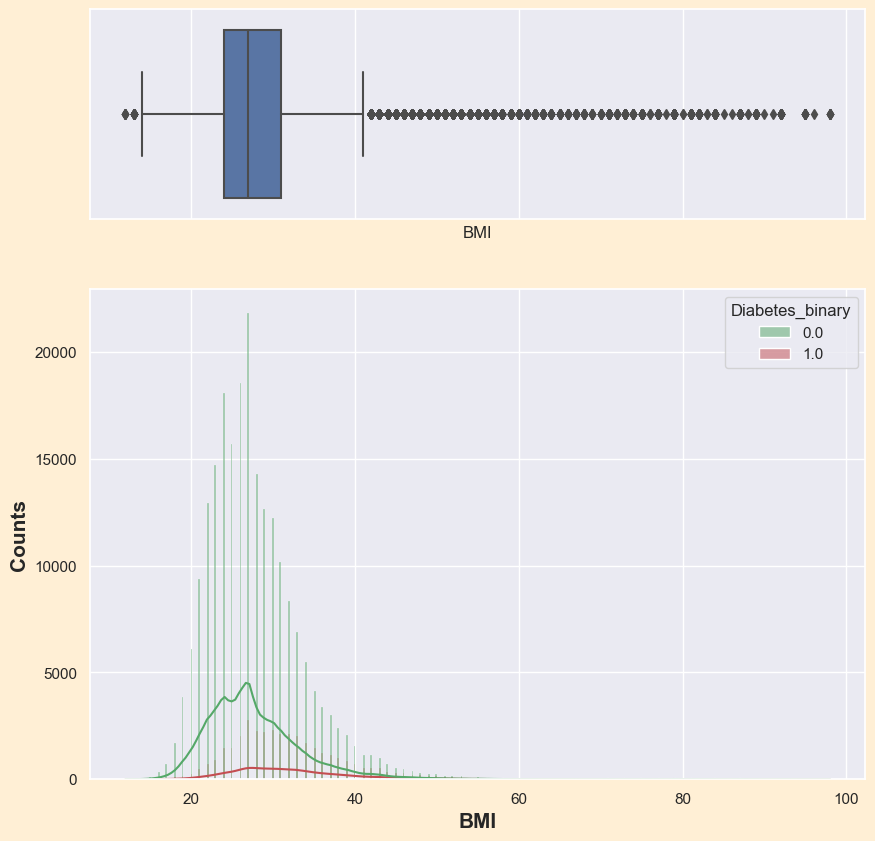

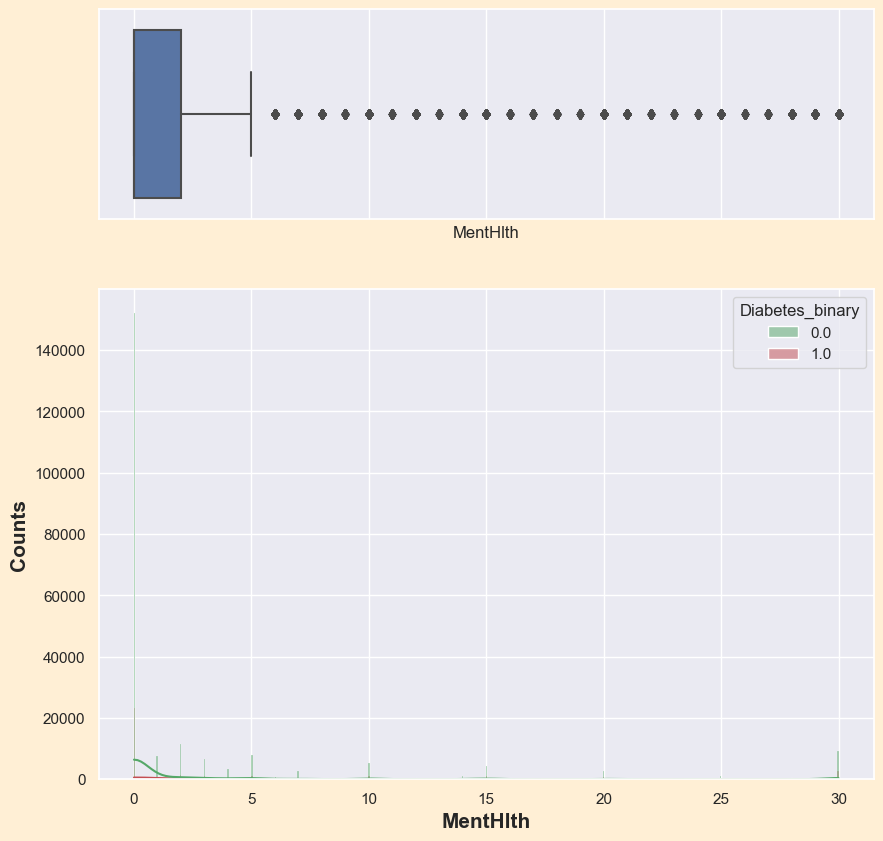

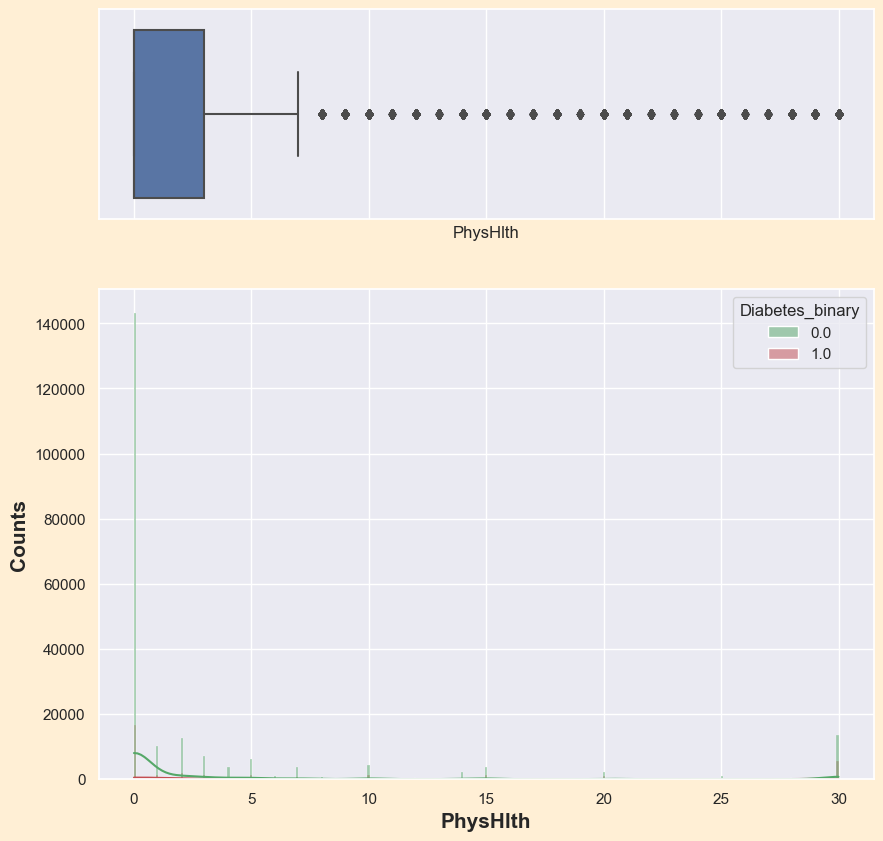

In [21]:
p=1
for i in ['BMI','MentHlth','PhysHlth']:
    fig,axs = plt.subplots(2,figsize=(10,10),gridspec_kw={'height_ratios':(.3,.7)},sharex=True)
    sns.boxplot(x=i,data=dia_o,hue=dia_o.Diabetes_binary,ax=axs[0])
    sns.histplot(x=i,data=dia_o,hue=dia_o.Diabetes_binary,kde=True,ax=axs[1],palette=['g','r'])
    plt.xlabel(i,fontsize=15,fontweight='bold')
    plt.ylabel('Counts',fontsize=15,fontweight ='bold')
    p+=1;

Text(0, 0.5, 'BMI')

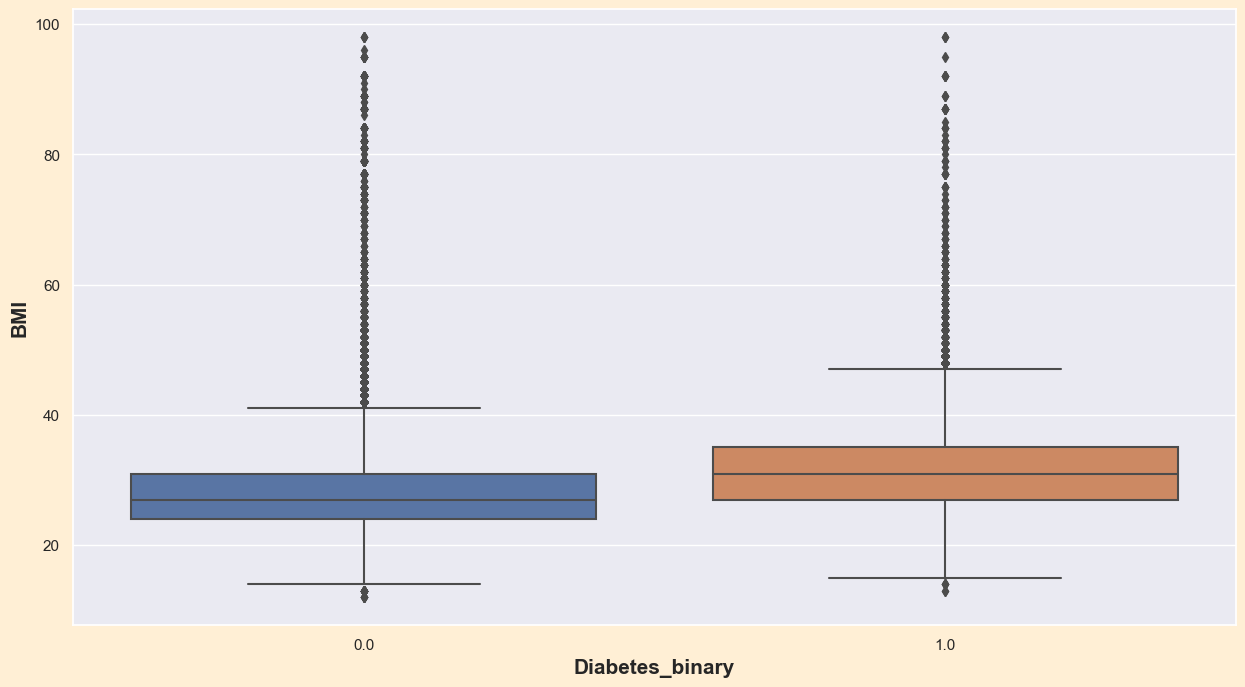

In [22]:
sns.boxplot(x='Diabetes_binary',y='BMI',data=dia_o);
plt.xlabel('Diabetes_binary',fontsize=15,fontweight='bold')
plt.ylabel('BMI',fontsize=15,fontweight ='bold')

### 75% of people with diabetes hv BMI greater than 25

In [23]:
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    ul = Q3+(IQR*1.5)
    ll = Q1-(IQR*1.5)
    print(ul,ll)
    #df = list(map(lambda x: ll if x<ll else x,df))
    df =list(map(lambda x: ul if x>ul else x,df))
    return df


dia['BMI'] = IQR(dia['BMI'])

44.0 12.0


Overweight – BMI greater than or equal to 25 to 29.9 kg/m^2 \
Obesity – BMI greater than or equal to 30 kg/m^2 \
Obesity class I – BMI 30 to 34.9 kg/m^2 \
Obesity class II – BMI 35 to 39.9 kg/m^2 \
Obesity class III – BMI greater than or equal to 40 kg/m^2 (also referred to as severe, extreme, or massive obesity)

In [24]:
sns.set_color_codes(palette='dark')

Text(0, 0.5, 'Count')

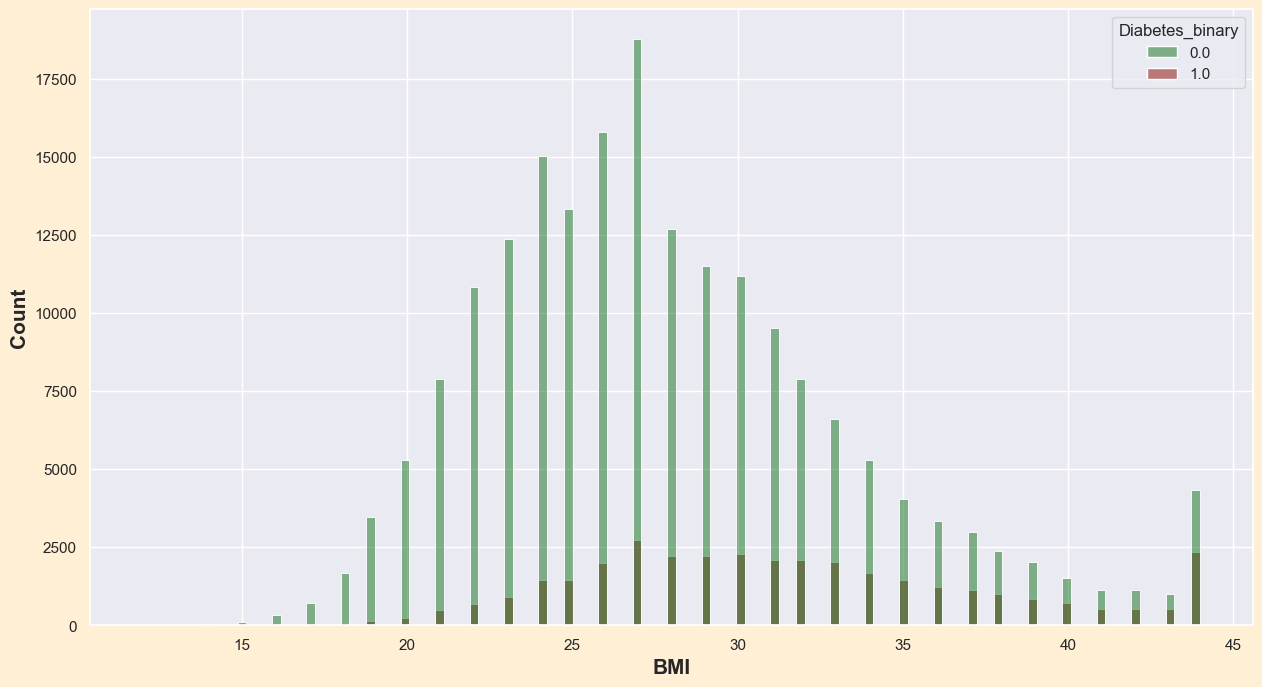

In [25]:
sns.histplot(x='BMI',data=dia,hue='Diabetes_binary',palette=['g','r']);
plt.xlabel('BMI',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight ='bold')

Text(0, 0.5, 'BMI')

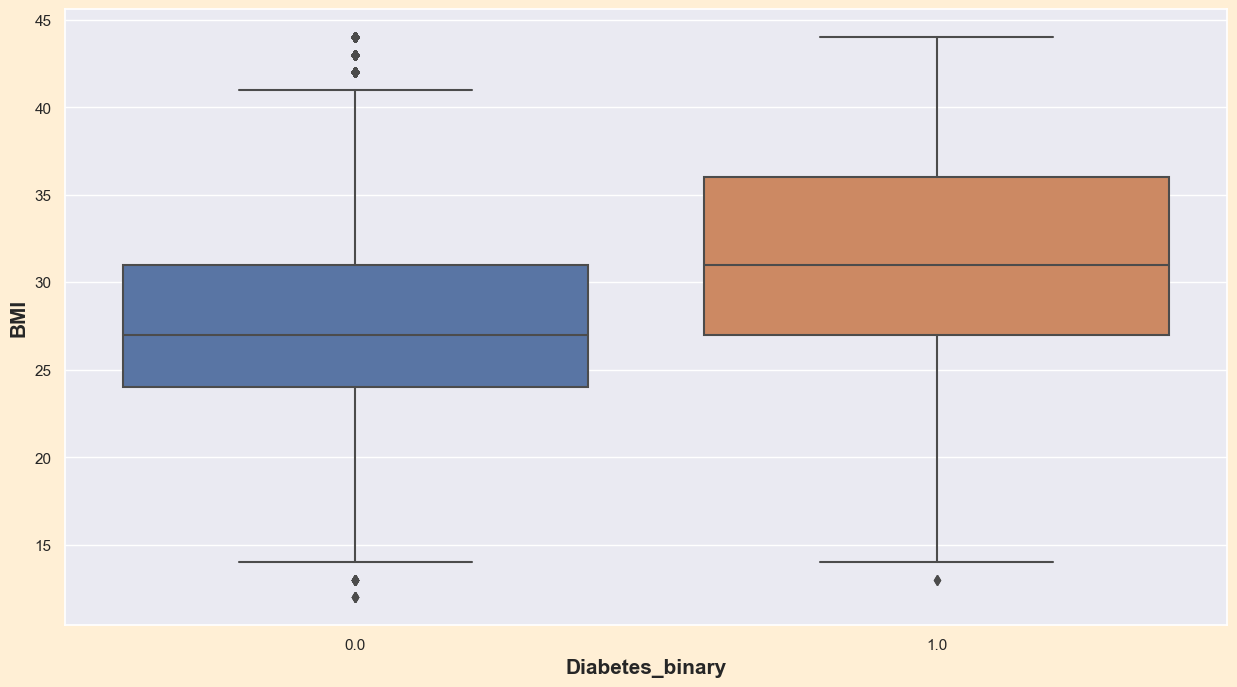

In [26]:
sns.boxplot(x='Diabetes_binary',y='BMI',data=dia);
plt.xlabel('Diabetes_binary',fontsize=15,fontweight='bold')
plt.ylabel('BMI',fontsize=15,fontweight ='bold')

Overweight – BMI greater than or equal to 25 to 29.9 kg/m^2 \
Obesity – BMI greater than or equal to 30 kg/m^2 \
Obesity class I – BMI 30 to 34.9 kg/m^2 \
Obesity class II – BMI 35 to 39.9 kg/m^2 \
Obesity class III – BMI greater than or equal to 40 kg/m^2 (also referred to as severe, extreme, or massive obesity)

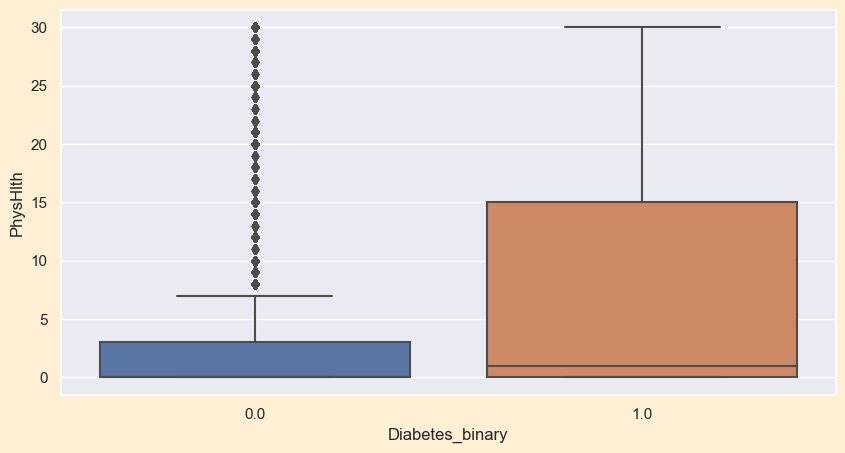

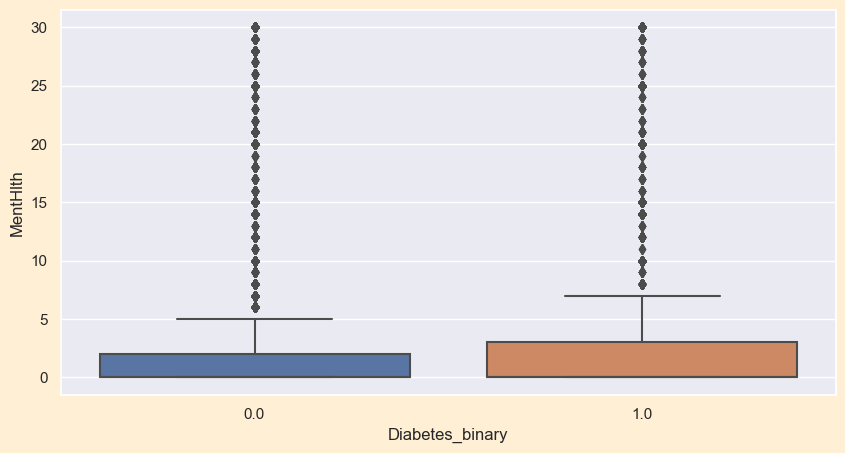

In [27]:
p=1
for i in ['PhysHlth','MentHlth']:
    plt.subplots(figsize=(10,5))
    sns.boxplot(y=i,x='Diabetes_binary',data=dia)
    p+=1;

#### Diabetes patient on a avg hv higher days of mental health problem

In [28]:
dia.MentHlth.value_counts()

0.0     152325
2.0      12692
30.0     12079
5.0       8913
1.0       8307
3.0       7301
10.0      6352
15.0      5501
4.0       3774
20.0      3362
7.0       3090
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: MentHlth, dtype: int64

In [29]:
dia[(dia.Diabetes_binary == 1) & (dia.BMI<18)].Diabetes_binary.value_counts()

1.0    86
Name: Diabetes_binary, dtype: int64

In [30]:
dia[(dia.Diabetes_binary == 1)& (dia.BMI>18) & (dia.BMI<25)].Diabetes_binary.value_counts()

1.0    3910
Name: Diabetes_binary, dtype: int64

In [31]:
dia[(dia.Diabetes_binary == 1) & (dia.BMI>25)].Diabetes_binary.value_counts()

1.0    29578
Name: Diabetes_binary, dtype: int64

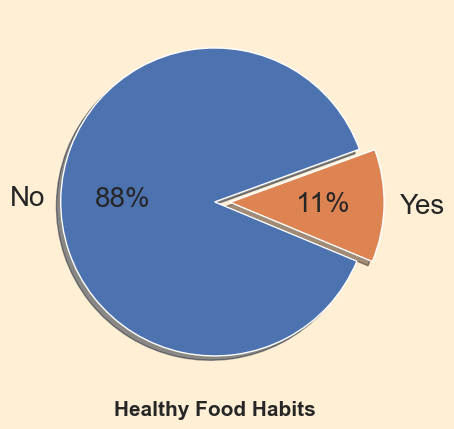

In [32]:
plt.subplots(figsize=(5,5))
(dia[(dia.PhysHlth<=7)&(dia.Fruits==1)&(dia.Veggies==1)].Diabetes_binary.value_counts(normalize=True)*100).plot.pie(autopct = '%i%%',explode = [0.0,0.1],labels=['No','Yes'],startangle=20,fontsize=20,shadow=True)
plt.ylabel('')
plt.xlabel('Healthy Food Habits',fontsize=15,fontweight ='bold');

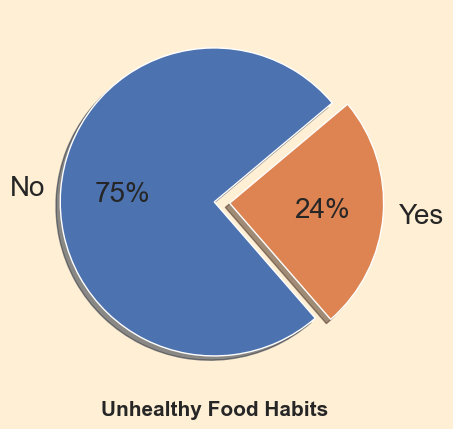

In [33]:
plt.subplots(figsize=(5,5))
(dia[~(dia.PhysHlth<=7)&(dia.Fruits==1)&(dia.Veggies==1)].Diabetes_binary.value_counts(normalize=True)*100).plot.pie(autopct = '%i%%',explode = [0.0,0.1],labels=['No','Yes'],startangle=40,fontsize=20,shadow=True)
plt.ylabel('')
plt.xlabel('Unhealthy Food Habits',fontsize=15,fontweight ='bold');

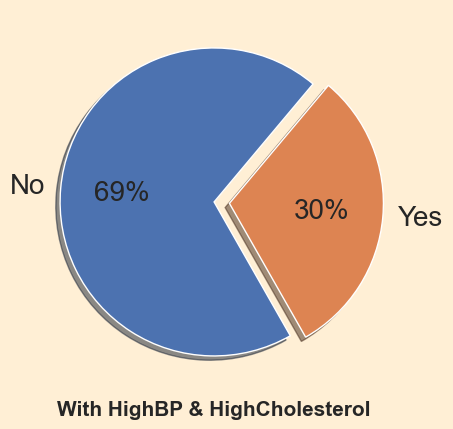

In [34]:
plt.subplots(figsize=(5,5))
(dia[(dia.HighBP==1)&(dia.HighChol==1)].Diabetes_binary.value_counts(normalize=True)*100).plot.pie(autopct = '%i%%',explode = [0.0,0.1],labels=['No','Yes'],startangle=50,fontsize=20,shadow=True)
plt.ylabel('')
plt.xlabel('With HighBP & HighCholesterol',fontsize=15,fontweight ='bold');

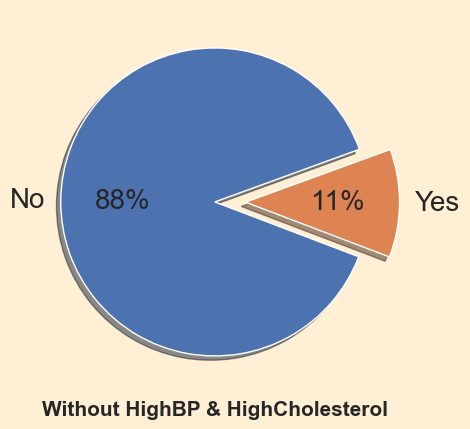

In [35]:
plt.subplots(figsize=(5,5))
(dia[~(dia.HighBP==1)&(dia.HighChol==1)].Diabetes_binary.value_counts(normalize=True)*100).plot.pie(autopct = '%i%%',explode = [0.0,0.2],labels=['No','Yes'],startangle=20,fontsize=20,shadow=True)
plt.ylabel('')
plt.xlabel('Without HighBP & HighCholesterol',fontsize=15,fontweight ='bold');

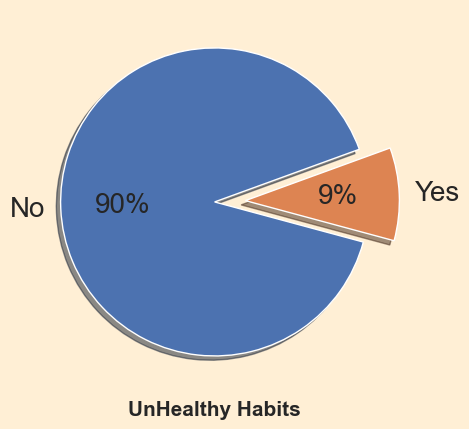

In [36]:
plt.subplots(figsize=(5,5))
(dia[(dia.PhysActivity==0)&(dia.Smoker==1)&(dia.HvyAlcoholConsump==1)].Diabetes_binary.value_counts(normalize=True)*100).plot.pie(autopct = '%i%%',explode = [0.0,0.2],labels=['No','Yes'],startangle=20,fontsize=20,shadow=True);
plt.ylabel('')
plt.xlabel('UnHealthy Habits',fontsize=15,fontweight ='bold');

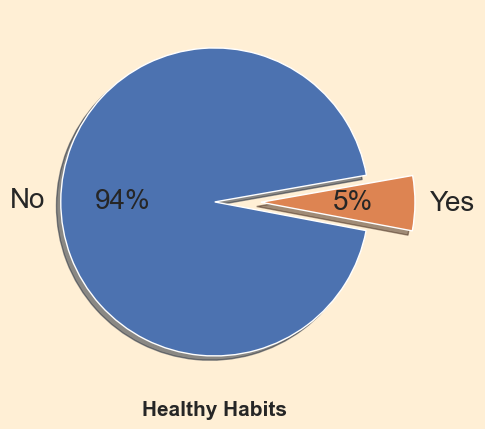

In [37]:
plt.subplots(figsize=(5,5))
(dia[~(dia.PhysActivity==0)&(dia.Smoker==1)&(dia.HvyAlcoholConsump==1)].Diabetes_binary.value_counts(normalize=True)*100).plot.pie(autopct = '%i%%',explode = [0.0,0.3],labels=['No','Yes'],startangle=10,fontsize=20,shadow=True)
plt.ylabel('')
plt.xlabel('Healthy Habits',fontsize=15,fontweight ='bold');

In [38]:
pd.crosstab(dia.Education,dia.Income,normalize='index')*100

Income           1.0        2.0        3.0        4.0        5.0        6.0  \
Education                                                                     
1.0        21.264368  14.367816  16.091954  10.344828  12.643678  10.344828   
2.0        22.277228  18.316832  18.316832  14.975248  11.831683   7.227723   
3.0        16.203655  15.464244  18.009929  15.337488  13.393895   9.717968   
4.0         5.866763   7.658203  10.575224  12.993260  14.460768  17.294352   
5.0         3.660225   4.975619   6.990849   9.392872  12.663295  17.363494   
6.0         1.475772   1.745537   2.650043   4.188155   7.146500  13.169736   

Income           7.0        8.0  
Education                        
1.0         7.471264   7.471264  
2.0         3.539604   3.514851  
3.0         6.232175   5.640646  
4.0        14.997382  16.154048  
5.0        18.909157  26.044489  
6.0        20.010201  49.614055

In [39]:
((pd.crosstab([dia_1.Education],[dia_1.Income],normalize='columns')*100).style.background_gradient('Greens',axis='index'))

In [40]:
((pd.crosstab([dia_0.Education],[dia_0.Income],normalize='columns')*100).style.background_gradient('Greens',axis='index'))

## P_value Matrix

## correlation btw Health People

In [41]:
from scipy.stats import chi2_contingency,chisquare

dia_0 = dia[dia.Diabetes_binary == 0].copy()
dia_1 = dia[dia.Diabetes_binary == 1].copy()

In [42]:
c = dia_0.drop(['PhysHlth','MentHlth','BMI','Age','Diabetes_binary'],axis=1).columns
co =  dia_0.drop(['PhysHlth','MentHlth','BMI','Age','Diabetes_binary'],axis=1).corr()
chi = np.triu(np.ones_like(co))
x=0
for r in c:
    p=[]
    for i in c:
        if r != i:
            chi_value,p_value,degree_of_freedom,e = chi2_contingency(pd.crosstab(dia_0[r],dia_0[i],dia_0.Diabetes_binary,aggfunc='count'))
            p.append(p_value)
        else:
            p_value = chisquare(dia_0[i].value_counts().values,dia_0[i].value_counts().values)
            p.append(p_value[1])
    chi[x] = chi[x] *p
    x+=1

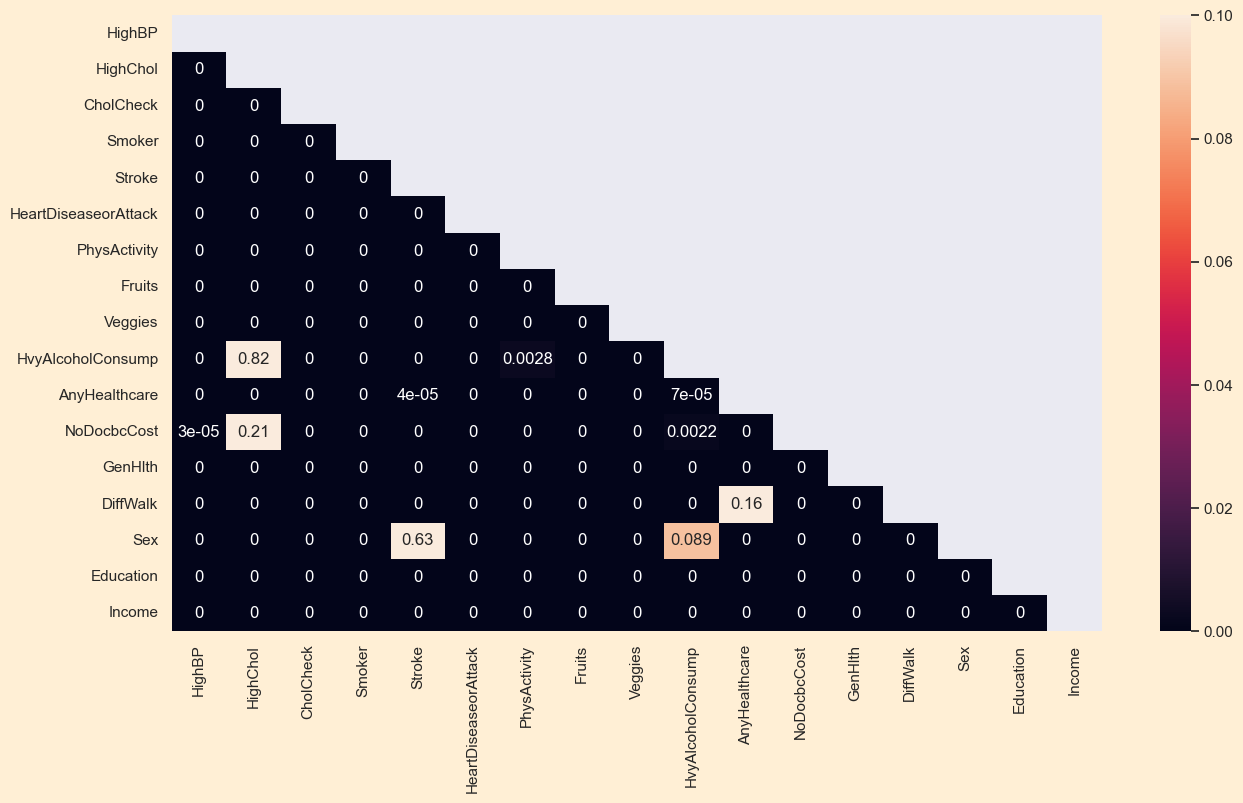

In [43]:
mask = np.triu(np.ones_like(chi))
sns.heatmap(round(DF(chi,columns=c,index=c),5).T,annot=True,mask=mask,vmin=0,vmax=0.1);

## correlation btw variables of Diabetic people

In [44]:
c = dia_1.drop(['PhysHlth','MentHlth','BMI','Age','Diabetes_binary'],axis=1).columns
co =  dia_1.drop(['PhysHlth','MentHlth','BMI','Age','Diabetes_binary'],axis=1).corr()
chi_1 = np.triu(np.ones_like(co))
x=0
for r in c:
    p=[]
    for i in c:
        if r != i:
            chi_value,p_value,degree_of_freedom,e = chi2_contingency(pd.crosstab(dia_1[r],dia_1[i]))
            p.append(p_value)
        else:
            p_value = chisquare(dia_1[i].value_counts().values,dia_1[i].value_counts().values)
            p.append(p_value[1])
    chi_1[x] = chi_1[x] *p
    x+=1

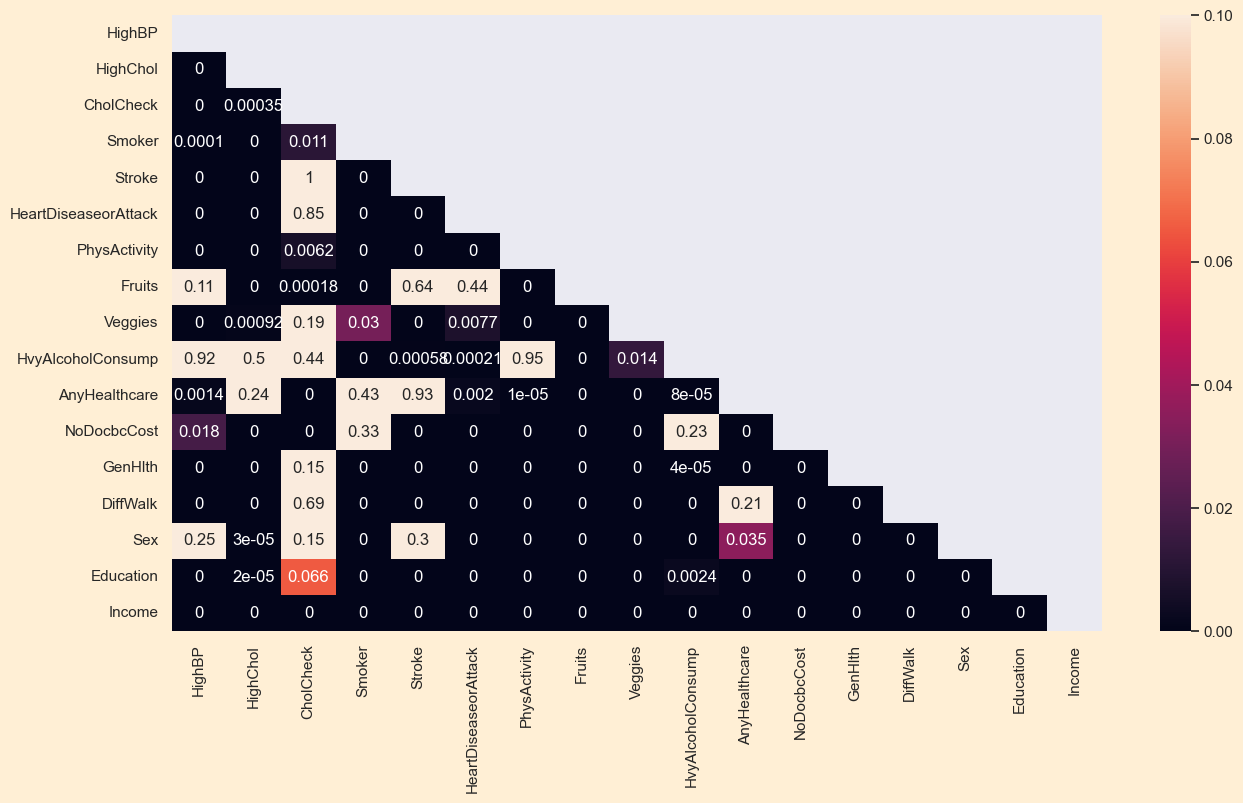

In [45]:
mask = np.triu(np.ones_like(chi_1))
sns.heatmap(round(DF(chi_1,columns=c,index=c),5).T,annot=True,mask=mask,vmin=0,vmax=0.1);

By accepting null hypothesis we can say that in population of Diabetes people there is no relation between\
`Sex and HighBP`\
`DiffWalk and AnyHealtcare`\
and By rejecting null hypothesis we can say that few features are dependent\
`GenHlth ,HighBP,HighChol`

In [46]:
chi2_contingency(pd.crosstab(dia.HighBP,dia.Stroke),correction=False)

(3560.243525166341,
 0.0,
 1,
 array([[119602.46764339,   5611.53235661],
        [ 99587.53235661,   4672.46764339]]))

### Correlation between cat columns using chi2

In [47]:
col = dia.drop(['PhysHlth','MentHlth','BMI'],axis=1).columns
chi = []
for r in col:
    for c in col:
        if r!=c:
            t = chi2_contingency(pd.crosstab(dia[r],dia[c]))
            chi.append(t[1])
        else:
            chi.append(1)
chi = np.array(chi)
chi_m = (chi.reshape(len(col),len(col))).round(5)
chi_m

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.7535e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.5007e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 7.6390e-02,
        0.0000e+00, 0.0000e+00, 2.9990e-02, 0.0000e+00, 7.6448e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.000

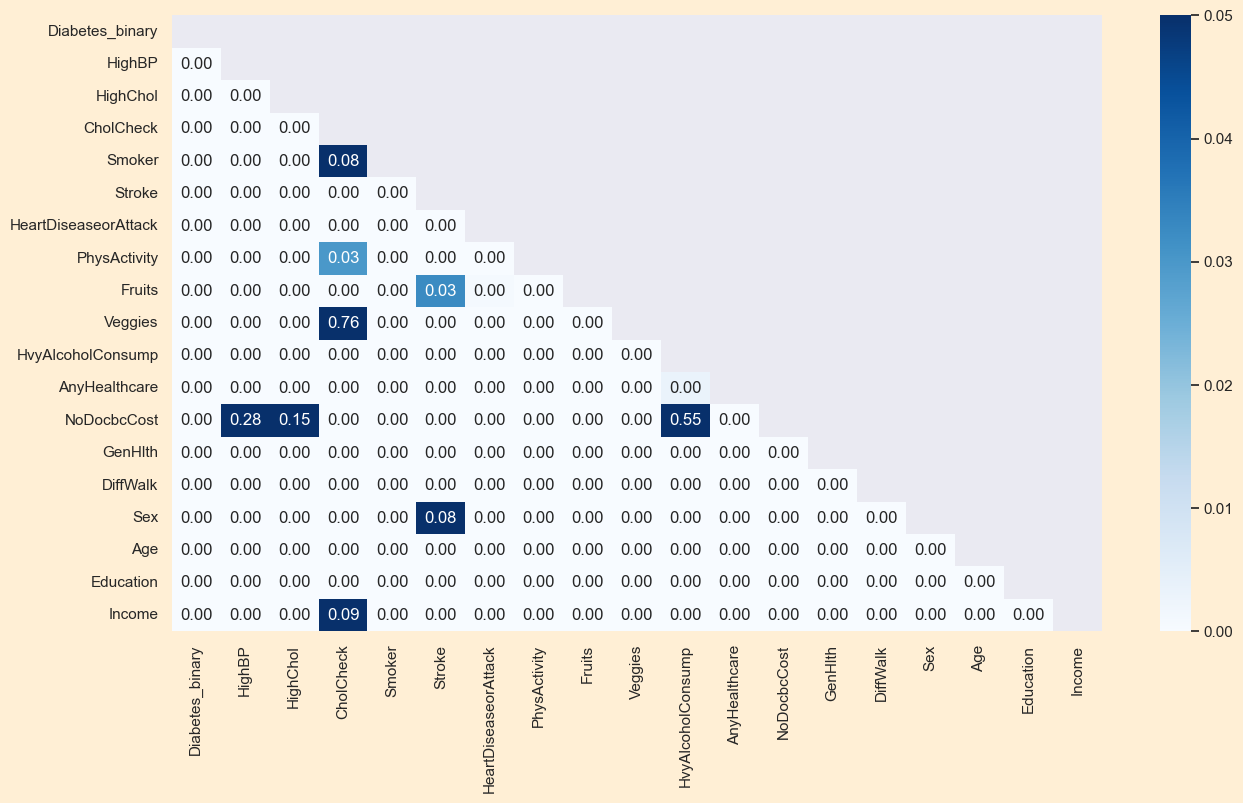

In [48]:
mask = np.triu(np.ones_like(chi_m))
sns.heatmap(DF(chi_m,columns=col,index=col),mask=mask,vmax=0.05,vmin=0,annot=True,cmap='Blues',fmt="0.2f");

In [49]:
# chi2_contingency tells just two variables are dependent are not but doesnt tell us about the strength of association
# so we can use Carmer's V

In [50]:
# cramers_v Score
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [51]:
c = dia.drop(['PhysHlth','MentHlth','BMI','Age'],axis=1).columns
co =  dia.drop(['PhysHlth','MentHlth','BMI','Age'],axis=1).corr()
cv_mat = np.triu(np.ones_like(co))
x=0
for r in c:
    p=[]
    for i in c:
        if r != i:
            cv = cramers_v(dia[r],dia[i])
            p.append(cv)
        else:
            p_value = chisquare(dia[i].value_counts().values,dia[i].value_counts().values)
            p.append(p_value[1])
    cv_mat[x] = cv_mat[x] *p
    x+=1

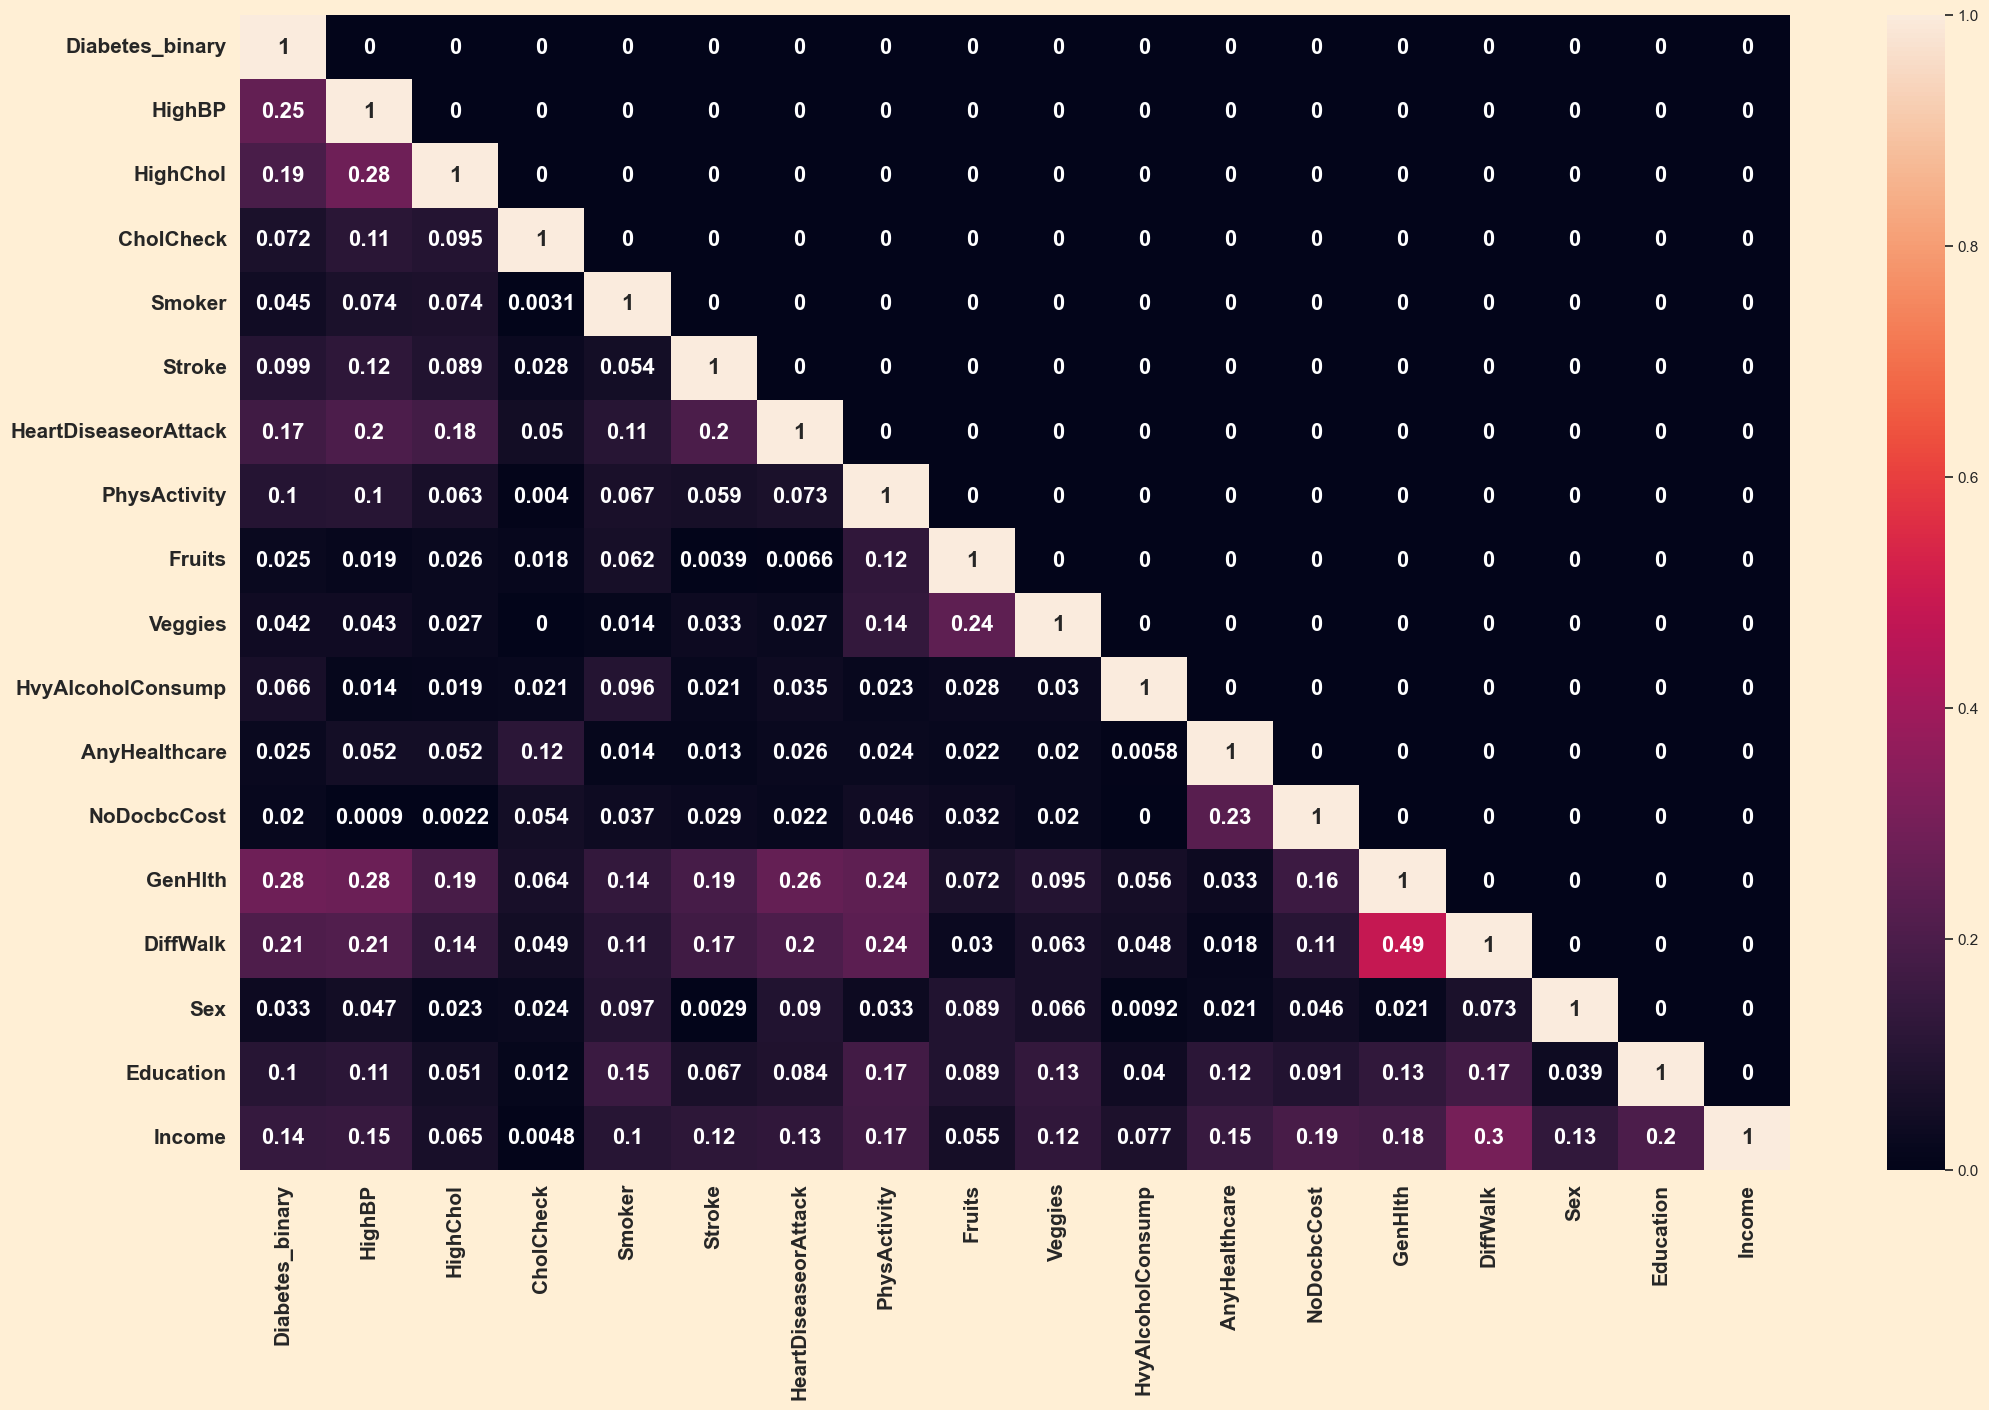

In [52]:
c = dia.drop(['PhysHlth','MentHlth','BMI','Age'],axis=1).columns
plt.subplots(figsize=(25,15))
sns.heatmap(DF((cv_mat.round(4)).T,columns=c,index=c),annot=True,vmin=0,vmax=1,annot_kws={'fontsize':16,'fontweight':'bold'})
plt.xticks(fontsize=15,fontweight ='bold')
plt.yticks(fontsize=15,fontweight ='bold');

By cramers_v score we can say taht there is no multicolinearity between categorical features

In [53]:
col = dia.drop(['PhysHlth','MentHlth','BMI','Diabetes_binary'],axis=1).columns
d = {}
for i in col:
    d.update({i:(pd.crosstab(dia.Diabetes_binary,dia[i],normalize='index'))*100})

d['HighBP']

HighBP                 0.0        1.0
Diabetes_binary                      
0.0              59.946393  40.053607
1.0              24.765649  75.234351

In [54]:
chi2_contingency(pd.crosstab(dia.Diabetes_binary,dia.Sex)),pd.crosstab(dia.Diabetes_binary,dia.Sex)

((245.55384122428245,
  2.4197839454991873e-55,
  1,
  array([[109028.62875533,  85348.37124467],
         [ 19686.37124467,  15410.62875533]])),
 Sex                 0.0    1.0
 Diabetes_binary               
 0.0              110370  84007
 1.0               18345  16752)

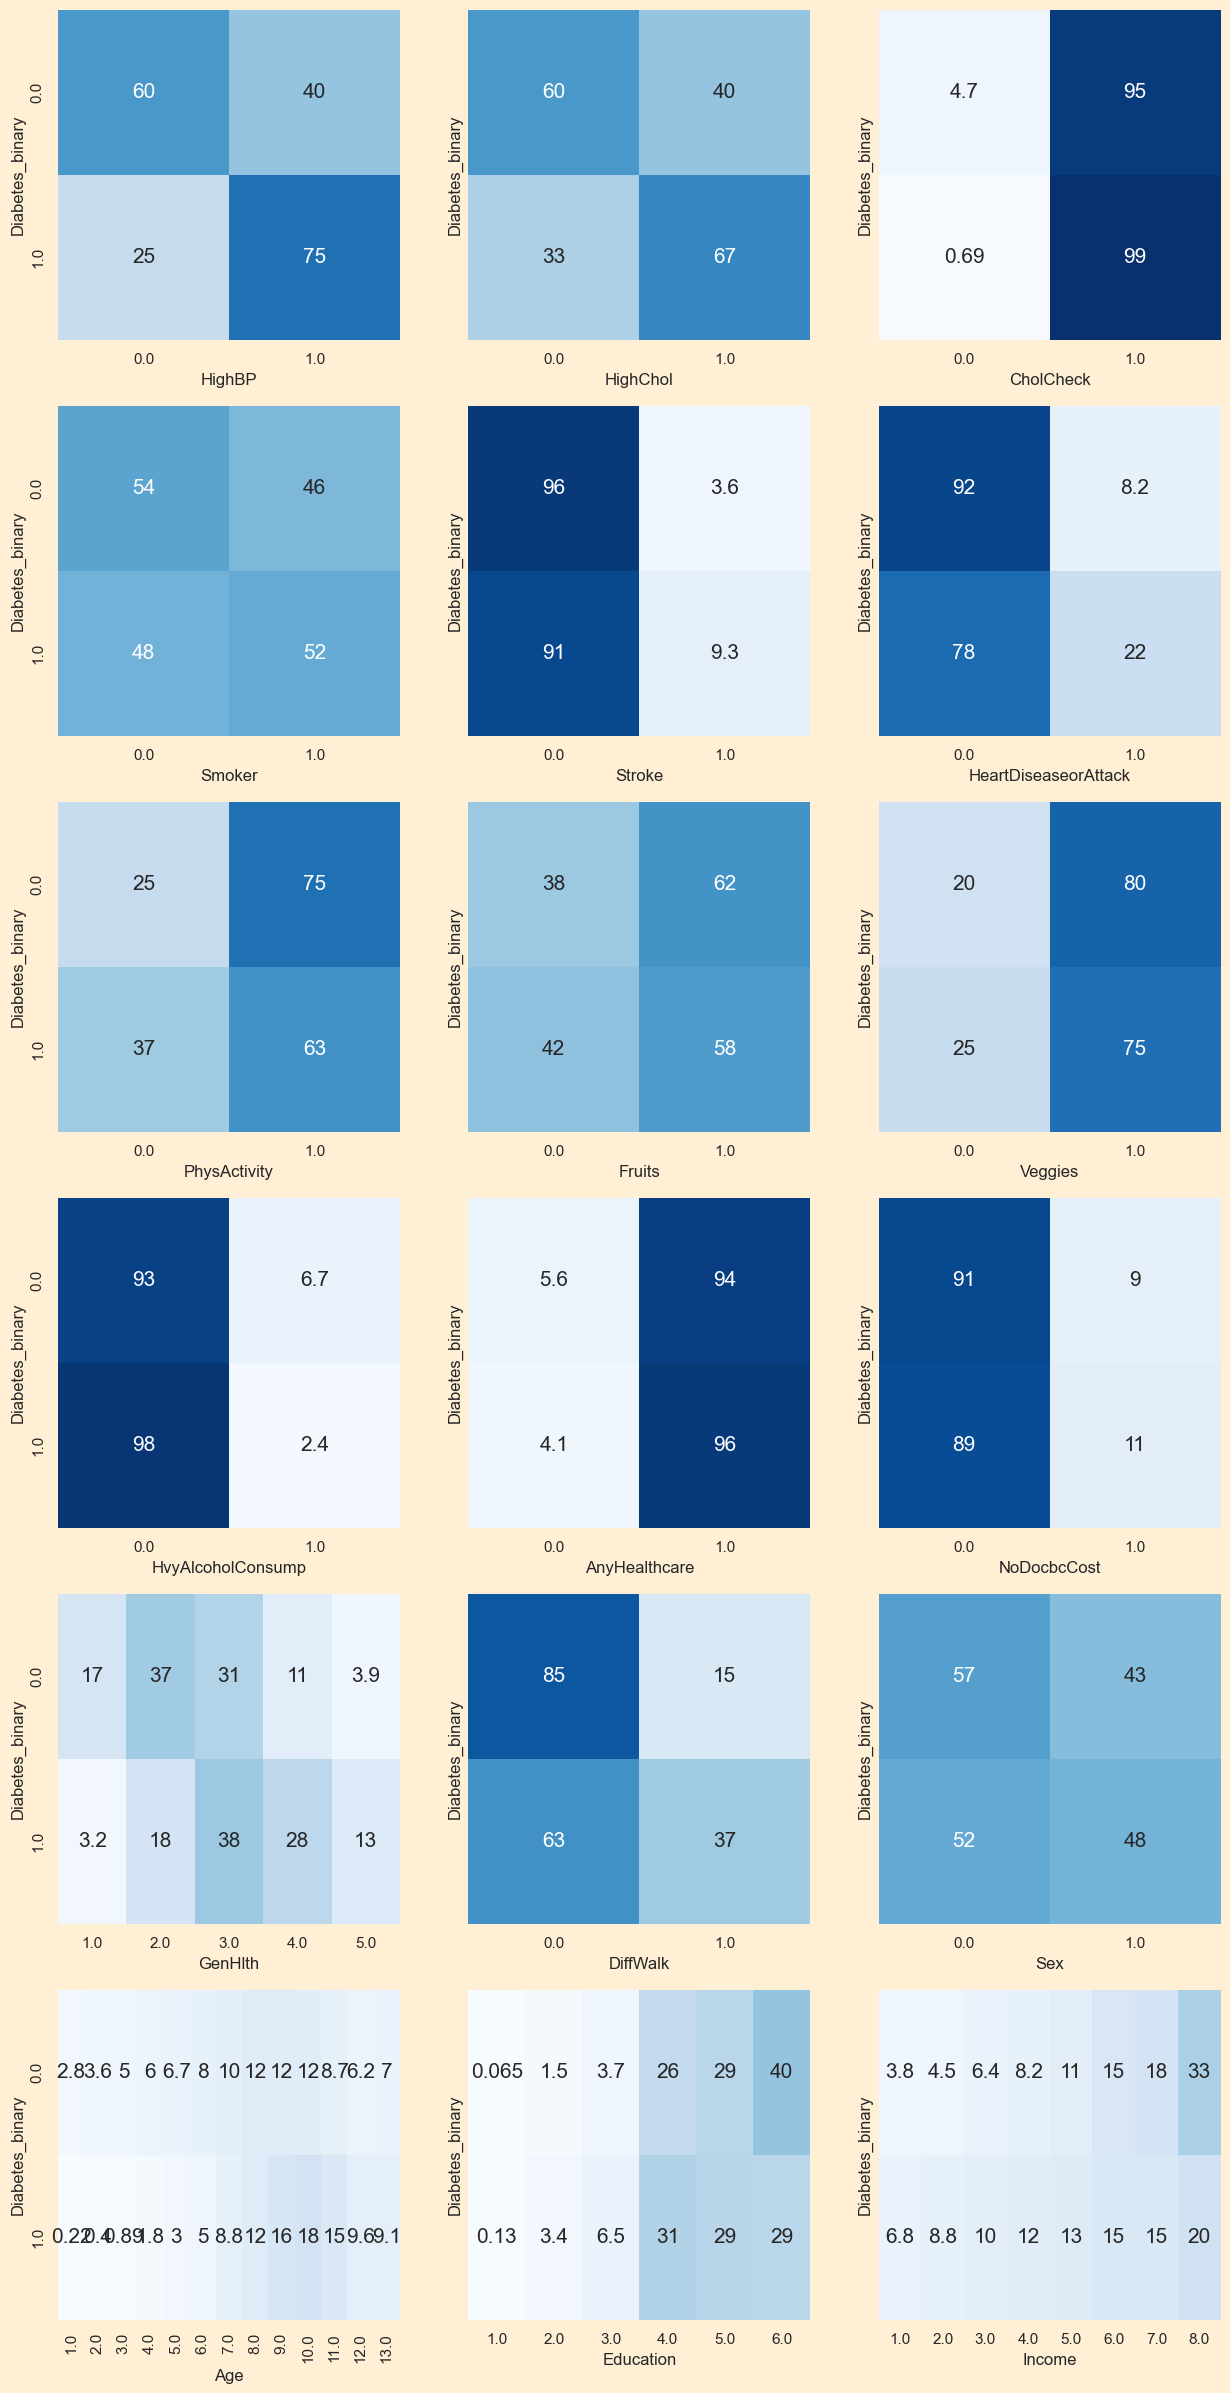

In [55]:
# visualization of target variable VS features
plt.subplots(6,3,figsize=(15,30),sharey=True)
p=1
for i in d:
    plt.subplot(6,3,p)
    sns.heatmap(d[i],cbar=False,cmap='Blues',annot=True,vmax=100,vmin=0,annot_kws={'fontsize':15});
    p+=1

## Anova test for numerical col

In [56]:
t = dia.drop('BMI',axis=1).astype('object')
t = pd.concat((t,dia.BMI),axis=1,copy=True)

In [57]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

m = ols('BMI ~ HighBP + HighChol + CholCheck + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + DiffWalk + Sex + Age + Income + Education + GenHlth + Diabetes_binary'
        ,data = t).fit()
anova_table = anova_lm(m,typ=2)
anova_table

sum_sq        df            F         PR(>F)
HighBP                1.713796e+05       1.0  5944.544061   0.000000e+00
HighChol              4.407740e+03       1.0   152.888682   4.157215e-35
CholCheck             3.791613e+03       1.0   131.517449   1.944741e-30
Smoker                1.849631e+04       1.0   641.570721  2.384315e-141
Stroke                6.455626e+03       1.0   223.922486   1.332746e-50
HeartDiseaseorAttack  9.073301e+02       1.0    31.472023   2.025668e-08
PhysActivity          3.103872e+04       1.0  1076.621583  1.405840e-235
Fruits                4.320391e+03       1.0   149.858838   1.908002e-34
Veggies               6.311447e-01       1.0     0.021892   8.823745e-01
HvyAlcoholConsump     1.442944e+04       1.0   500.505296  9.702331e-111
AnyHealthcare         2.906971e+02       1.0    10.083237   1.496440e-03
NoDocbcCost           8.603444e+01       1.0     2.984226   8.408083e-02
DiffWalk              9.306345e+04       1.0  3228.036964   0.000000e+00
Sex                   1.187156e+04       1.0   411.781932   1.806275e-91
Age                   3.185693e+05      12.0   920.835306   0.000000e+00
Income                5.522912e+03       7.0    27.367138   7.254525e-38
Education             1.330971e+04       5.0    92.333213   1.879503e-97
GenHlth               1.105392e+05       4.0   958.551637   0.000000e+00
Diabetes_binary       1.448264e+05       1.0  5023.508369   0.000000e+00
Residual              6.614406e+06  229430.0          NaN            NaN

Where all p_value of less than 0.05 so by rejecting null hypothesis we can say that mean of all groups of categorical features are different

In [58]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,cohen_kappa_score
global score_card
score_card = DF(columns=['Model','Recall','Precision','f1-score','Accuracy','cohen_kappa_score','t'])
def Score_card(name,model,xtrain,ytrain,xtest,ytest):
    global score_card
    model = model.fit(xtrain,ytrain)
    ytr_pred = model.predict(xtrain)
    yts_pred = model.predict(xtest)
    score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytrain,ytr_pred,average='macro'),2),'Precision':round(precision_score(ytrain,ytr_pred,average='macro'),2),'f1-score':round(f1_score(ytrain,ytr_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytrain,ytr_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytrain,ytr_pred),2),'t':'train'},ignore_index=True)
    score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytest,yts_pred,average='macro'),2),'Precision':round(precision_score(ytest,yts_pred,average='macro'),2),'f1-score':round(f1_score(ytest,yts_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytest,yts_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytest,yts_pred),2),'t':'test'},ignore_index=True)
    return

In [59]:
def scr(name,model,xtrain , ytrain, xtest, ytest):
    global score_card
    #model = model.fit(xtrain,ytrain)
    ytr_pred = model.predict(xtrain)
    yts_pred = model.predict(xtest)
    score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytrain,ytr_pred,average='macro'),2),'Precision':round(precision_score(ytrain,ytr_pred,average='macro'),2),'f1-score':round(f1_score(ytrain,ytr_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytrain,ytr_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytrain,ytr_pred),2),'t':'train'},ignore_index=True)
    score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytest,yts_pred,average='macro'),2),'Precision':round(precision_score(ytest,yts_pred,average='macro'),2),'f1-score':round(f1_score(ytest,yts_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytest,yts_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytest,yts_pred),2),'t':'test'},ignore_index=True)
    return

In [60]:
from sklearn.preprocessing import StandardScaler,PowerTransformer,OneHotEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

In [61]:
#dia.reset_index(drop=True,inplace=True)
# scaling of data for log model
Y = dia[['Diabetes_binary']]
X = dia.drop('Diabetes_binary',axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=10,stratify=Y)

In [62]:
xtr_num = xtrain[['MentHlth','PhysHlth','BMI']].copy()
xtr_ob = xtrain.drop(['PhysHlth','MentHlth','BMI'],axis=1)
xts_num = xtest[['MentHlth','PhysHlth','BMI']].copy()
xts_ob = xtest.drop(['PhysHlth','MentHlth','BMI'],axis=1)

In [63]:
ssl=StandardScaler()
xtr_num = DF(ssl.fit_transform(xtr_num),columns=xtr_num.columns,index=xtrain.index)
xtr_num.head()

MentHlth  PhysHlth       BMI
198405 -0.454184 -0.516419  1.957729
84698  -0.454184 -0.516419 -0.589288
90877  -0.454184 -0.516419 -0.589288
69519  -0.454184 -0.184783 -2.287299
94634  -0.454184 -0.184783  0.599320

In [64]:
xtrain_s = pd.concat([xtr_ob,xtr_num],axis=1)
print(xtrain.shape)
xtrain_s

(160631, 21)


HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
198405     0.0       0.0        1.0     0.0     0.0                   0.0   
84698      1.0       0.0        1.0     1.0     0.0                   0.0   
90877      1.0       1.0        1.0     1.0     0.0                   0.0   
69519      1.0       0.0        1.0     1.0     1.0                   0.0   
94634      0.0       0.0        1.0     0.0     0.0                   0.0   
...        ...       ...        ...     ...     ...                   ...   
41660      1.0       1.0        1.0     1.0     0.0                   0.0   
184288     0.0       1.0        1.0     1.0     0.0                   0.0   
71464      1.0       1.0        1.0     1.0     0.0                   0.0   
51551      0.0       0.0        1.0     0.0     0.0                   0.0   
188656     1.0       0.0        1.0     1.0     0.0                   0.0   

        PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
198405           1.0     0.0      1.0                0.0            1.0   
84698            1.0     1.0      0.0                0.0            1.0   
90877            1.0     1.0      1.0                0.0            1.0   
69519            0.0     0.0      0.0                0.0            1.0   
94634            1.0     1.0      0.0                0.0            1.0   
...              ...     ...      ...                ...            ...   
41660            1.0     0.0      0.0                0.0            1.0   
184288           1.0     1.0      1.0                1.0            1.0   
71464            1.0     1.0      1.0                0.0            1.0   
51551            1.0     1.0      1.0                0.0            1.0   
188656           0.0     1.0      0.0                0.0            1.0   

        NoDocbcCost  GenHlth  DiffWalk  Sex   Age  Education  Income  \
198405          0.0      2.0       0.0  0.0   3.0        6.0     6.0   
84698           0.0      2.0       0.0  1.0  13.0        6.0     4.0   
90877           0.0      1.0       0.0  0.0  10.0        6.0     7.0   
69519           0.0      4.0       0.0  0.0  12.0        5.0     8.0   
94634           0.0      3.0       0.0  1.0   5.0        4.0     8.0   
...             ...      ...       ...  ...   ...        ...     ...   
41660           0.0      3.0       0.0  1.0   6.0        6.0     8.0   
184288          0.0      3.0       0.0  1.0   7.0        4.0     6.0   
71464           0.0      3.0       0.0  1.0  11.0        4.0     6.0   
51551           0.0      2.0       0.0  0.0   5.0        6.0     7.0   
188656          0.0      2.0       0.0  0.0   7.0        4.0     7.0   

        MentHlth  PhysHlth       BMI  
198405 -0.454184 -0.516419  1.957729  
84698  -0.454184 -0.516419 -0.589288  
90877  -0.454184 -0.516419 -0.589288  
69519  -0.454184 -0.184783 -2.287299  
94634  -0.454184 -0.184783  0.599320  
...          ...       ...       ...  
41660  -0.454184 -0.184783  1.278525  
184288 -0.454184 -0.516419 -0.419486  
71464  -0.454184 -0.516419  0.938923  
51551  -0.194717 -0.516419 -0.249685  
188656  0.194483 -0.516419 -0.079884  

[160631 rows x 21 columns]

ohe=OneHotEncoder(handle_unknown='ignore')
edu = ohe.fit_transform(dia[['Education']]).toarray()
edu = DF(edu,columns=[('Education_'+ str(ohe.categories_[0][i])) for i in range(len(ohe.categories_[0]))])
edu.head()

In [65]:
xtrain_c = sm.add_constant(xtrain_s)
base_model = sm.Logit(ytrain,xtrain_c).fit()
base_model.summary()

Optimization terminated successfully.
         Current function value: 0.342260
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               160631
Model:                          Logit   Df Residuals:                   160609
Method:                           MLE   Df Model:                           21
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.1999
Time:                        11:01:16   Log-Likelihood:                -54978.
converged:                       True   LL-Null:                       -68716.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.1453      0.104    -59.015      0.000      -6.349      -5.941
HighBP                   0.6856      0.018     38.623      0.000       0.651       0.720
HighChol                 0.5663      0.016     34.620      0.000       0.534       0.598
CholCheck                1.2190      0.080     15.162      0.000       1.061       1.377
Smoker                  -0.0088      0.016     -0.556      0.578      -0.040       0.022
Stroke                   0.1663      0.030      5.539      0.000       0.107       0.225
HeartDiseaseorAttack     0.2357      0.021     11.052      0.000       0.194       0.277
PhysActivity            -0.0098      0.017     -0.570      0.569      -0.044       0.024
Fruits                  -0.0300      0.016     -1.825      0.068      -0.062       0.002
Veggies                 -0.0152      0.019     -0.798      0.425      -0.052       0.022
HvyAlcoholConsump       -0.7622      0.046    -16.672      0.000      -0.852      -0.673
AnyHealthcare            0.0710      0.039      1.800      0.072      -0.006       0.148
NoDocbcCost              0.0139      0.027      0.510      0.610      -0.040       0.067
GenHlth                  0.4973      0.010     50.778      0.000       0.478       0.516
DiffWalk                 0.1108      0.020      5.470      0.000       0.071       0.150
Sex                      0.2626      0.016     16.166      0.000       0.231       0.294
Age                      0.1330      0.003     39.337      0.000       0.126       0.140
Education               -0.0167      0.008     -2.011      0.044      -0.033      -0.000
Income                  -0.0489      0.004    -11.449      0.000      -0.057      -0.041
MentHlth                -0.0188      0.008     -2.405      0.016      -0.034      -0.003
PhysHlth                -0.0685      0.008     -8.094      0.000      -0.085      -0.052
BMI                      0.4878      0.008     62.133      0.000       0.472       0.503
========================================================================================
"""

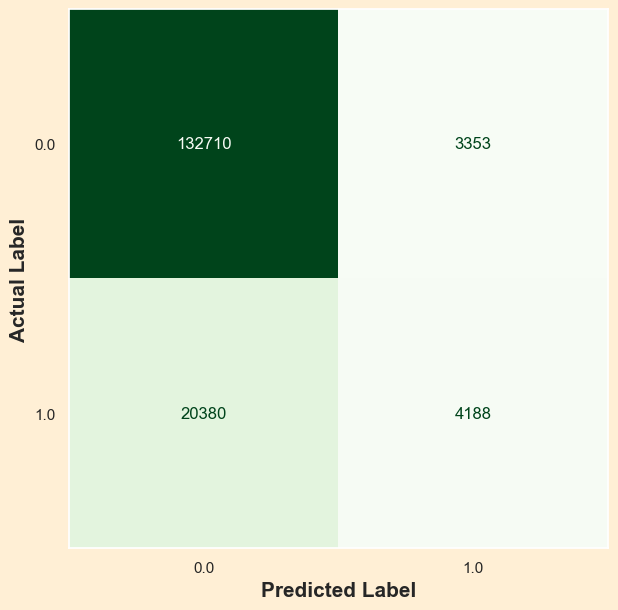

In [66]:
#sns.set_color_codes=False
plt.rcParams['axes.grid'] = False
fig,ax = plt.subplots(figsize=(10,7))
y_pred = [1 if i>0.5 else 0 for i in base_model.predict(xtrain_c)]
ConfusionMatrixDisplay.from_predictions(ytrain,y_pred,cmap='Greens',ax=ax,values_format='d',colorbar=False,)
plt.xlabel('Predicted Label',fontsize=15,fontweight ='bold')
plt.ylabel('Actual Label',fontsize=15,fontweight ='bold');

In [67]:
print(classification_report(ytrain,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    136063
         1.0       0.56      0.17      0.26     24568

    accuracy                           0.85    160631
   macro avg       0.71      0.57      0.59    160631
weighted avg       0.82      0.85      0.82    160631



In [68]:
ytrain.value_counts()

Diabetes_binary
0.0                136063
1.0                 24568
dtype: int64

In [69]:
T = DF(np.exp(base_model.params))
T.rename({0:'LogOdds'},inplace=True,axis=1)
T.sort_values('LogOdds',ascending=False,inplace=True)
T.drop('CholCheck',axis=0).style.background_gradient('Blues')

In [70]:
xts_num = DF(ssl.transform(xts_num),columns=xtr_num.columns,index=xtest.index)
xtest_s = pd.concat([xts_ob,xts_num],axis=1)
print(xtest_s.shape)
xtest_s.head()

(68843, 21)


HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
209815     0.0       1.0        1.0     1.0     0.0                   0.0   
141658     0.0       0.0        1.0     1.0     0.0                   0.0   
117583     1.0       0.0        1.0     0.0     1.0                   0.0   
227763     0.0       0.0        1.0     0.0     0.0                   0.0   
102910     0.0       0.0        1.0     0.0     0.0                   0.0   

        PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
209815           1.0     1.0      1.0                0.0            1.0   
141658           1.0     0.0      1.0                0.0            1.0   
117583           1.0     0.0      1.0                0.0            1.0   
227763           1.0     1.0      0.0                0.0            1.0   
102910           1.0     0.0      1.0                0.0            1.0   

        NoDocbcCost  GenHlth  DiffWalk  Sex   Age  Education  Income  \
209815          0.0      2.0       0.0  1.0   9.0        6.0     8.0   
141658          0.0      2.0       0.0  1.0  12.0        5.0     5.0   
117583          0.0      1.0       0.0  1.0  11.0        5.0     6.0   
227763          0.0      3.0       0.0  0.0   6.0        5.0     1.0   
102910          0.0      1.0       0.0  1.0  10.0        5.0     8.0   

        MentHlth  PhysHlth       BMI  
209815 -0.454184  1.805034 -0.249685  
141658 -0.454184 -0.516419 -0.759089  
117583 -0.454184 -0.516419  0.259718  
227763  0.453950  0.589035 -0.249685  
102910 -0.454184 -0.516419 -0.759089

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     58314
         1.0       0.55      0.17      0.25     10529

    accuracy                           0.85     68843
   macro avg       0.71      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843



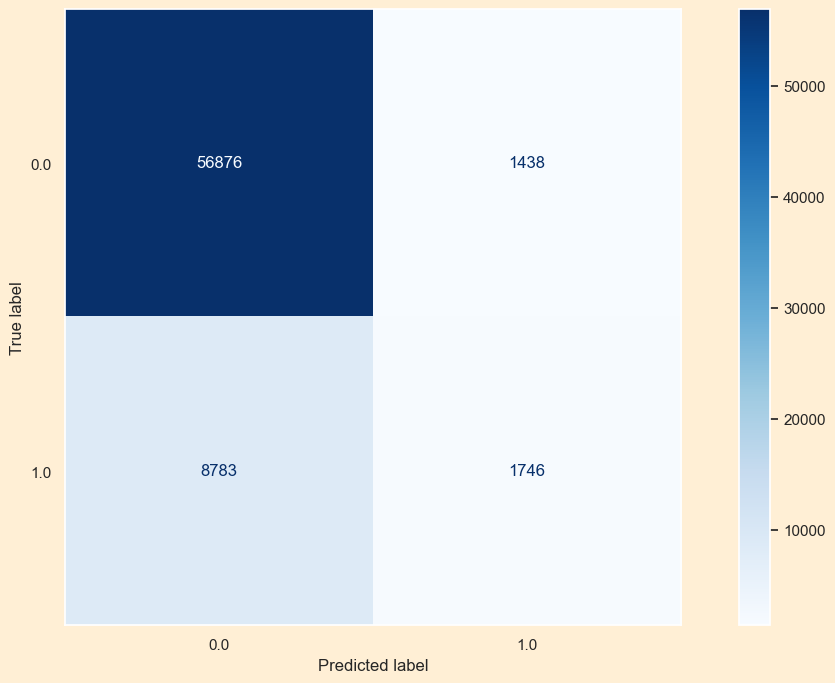

In [71]:
xtest_c = sm.add_constant(xtest_s)
y_pred_test = [1 if i>0.5 else 0 for i in base_model.predict(xtest_c)]
print(classification_report(ytest,y_pred_test))
ConfusionMatrixDisplay.from_predictions(ytest,y_pred_test,cmap='Blues',);

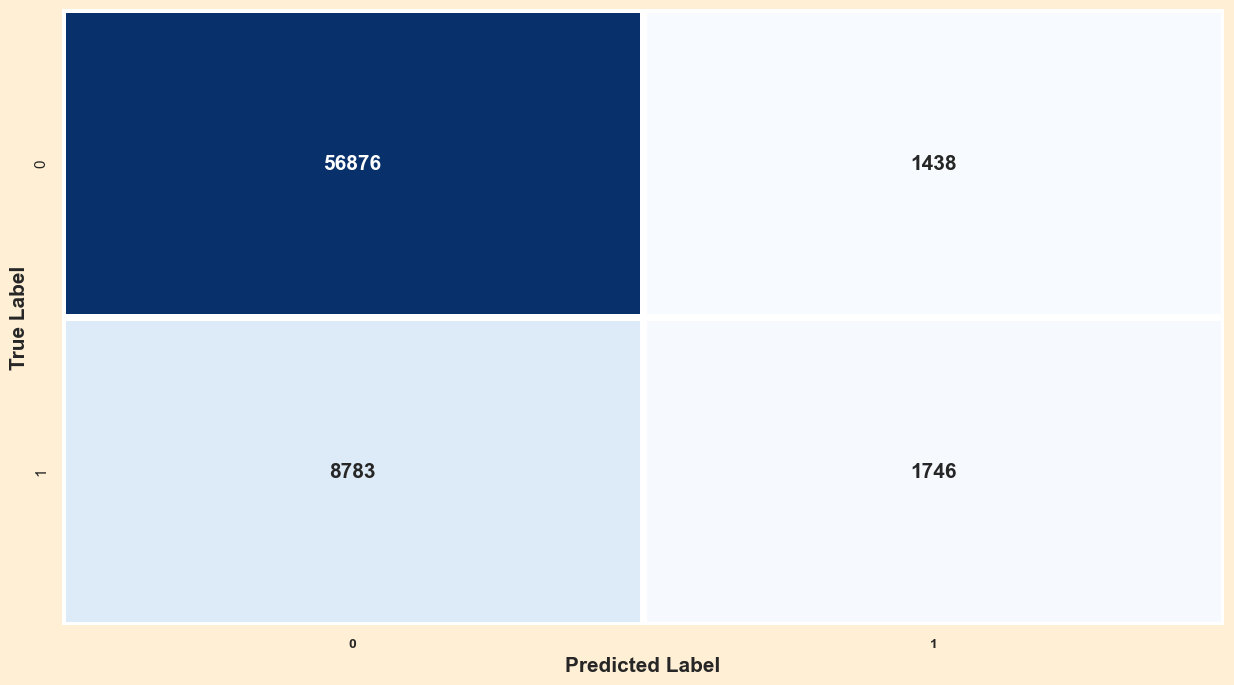

In [72]:
#print(classification_report(ytest,sc3_ytest))
sns.heatmap(DF(confusion_matrix(ytest,y_pred_test),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',
           fontsize=15);

In [73]:
xtest.shape

(68843, 21)

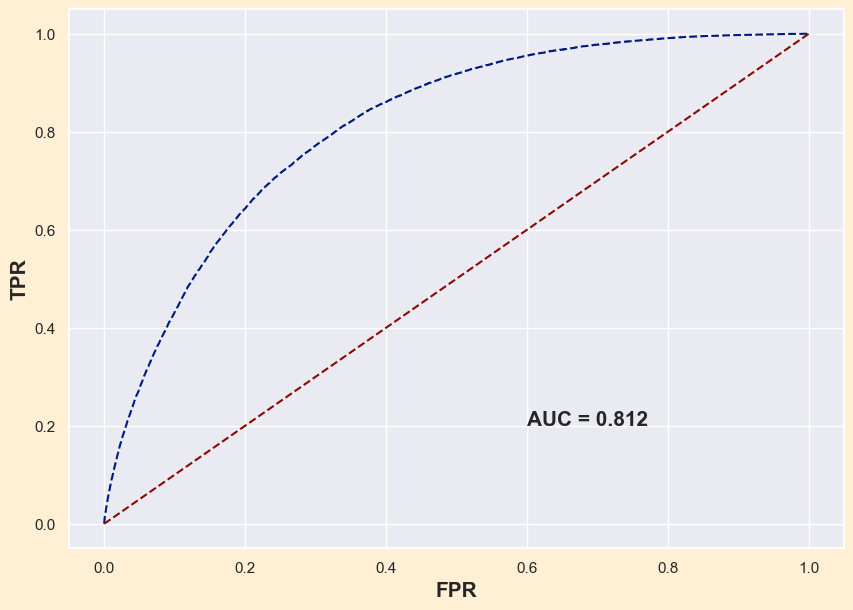

In [74]:
plt.rcParams['axes.grid'] = True
plt.subplots(figsize=(10,7))
fpt,tpr,th = roc_curve(ytrain,base_model.predict(xtrain_c))
plt.plot(fpt,tpr,'b--')
plt.plot([0,1],[0,1],'r--')
plt.text(0.6,0.2,str(f'AUC = {round(roc_auc_score(ytrain,base_model.predict(xtrain_c)),3)}'),fontsize=15,fontweight ='bold')
plt.xlabel('FPR',fontsize=15,fontweight ='bold')
plt.ylabel('TPR',fontsize=15,fontweight ='bold');

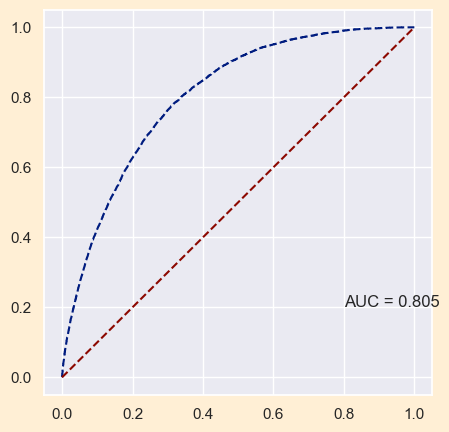

In [75]:
plt.subplots(figsize=(5,5))
fpt,tpr,th = roc_curve(ytest,base_model.predict(xtest_c))
plt.plot(fpt,tpr,'b--')
plt.plot([0,1],[0,1],'r--')
plt.text(0.8,0.2,str(f'AUC = {round(roc_auc_score(ytest,base_model.predict(xtest_c)),3)}'));

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

## Base model decision tree

In [77]:
dt = DecisionTreeClassifier(max_depth=10,random_state=10)
dtm = dt.fit(xtrain,ytrain)
dtfi = DF({'Columns':xtrain.columns,'Feature_importances':dtm.feature_importances_})

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    136063
         1.0       0.61      0.19      0.29     24568

    accuracy                           0.86    160631
   macro avg       0.74      0.58      0.61    160631
weighted avg       0.83      0.86      0.82    160631

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58314
         1.0       0.51      0.16      0.24     10529

    accuracy                           0.85     68843
   macro avg       0.69      0.57      0.58     68843
weighted avg       0.81      0.85      0.81     68843



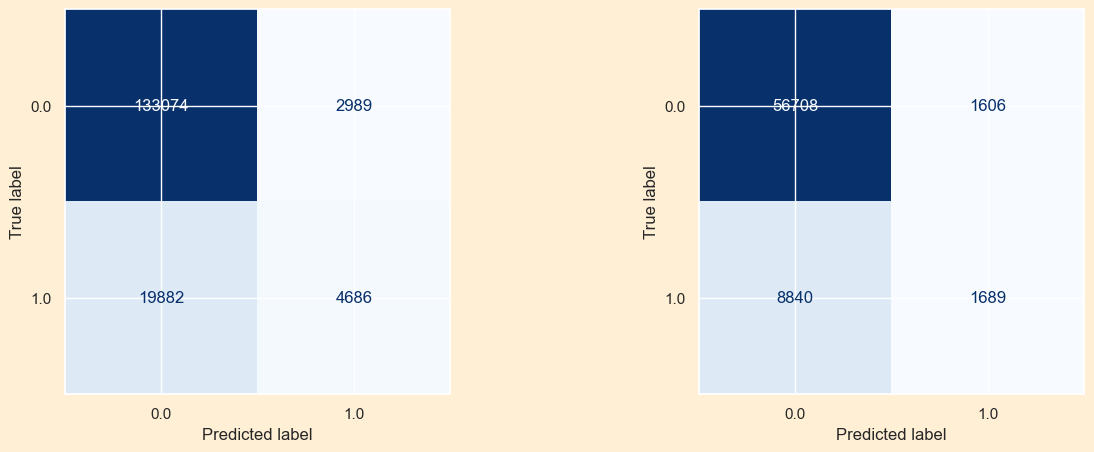

In [78]:
print(classification_report(ytrain,dtm.predict(xtrain)))
print(classification_report(ytest,dtm.predict(xtest)))
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,dtm.predict(xtrain),ax=ax[0],cmap='Blues',values_format='d',colorbar=False)
ConfusionMatrixDisplay.from_predictions(ytest,dtm.predict(xtest),ax=ax[1],cmap='Blues',values_format='d',colorbar=False)

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58314
         1.0       0.51      0.16      0.24     10529

    accuracy                           0.85     68843
   macro avg       0.69      0.57      0.58     68843
weighted avg       0.81      0.85      0.81     68843



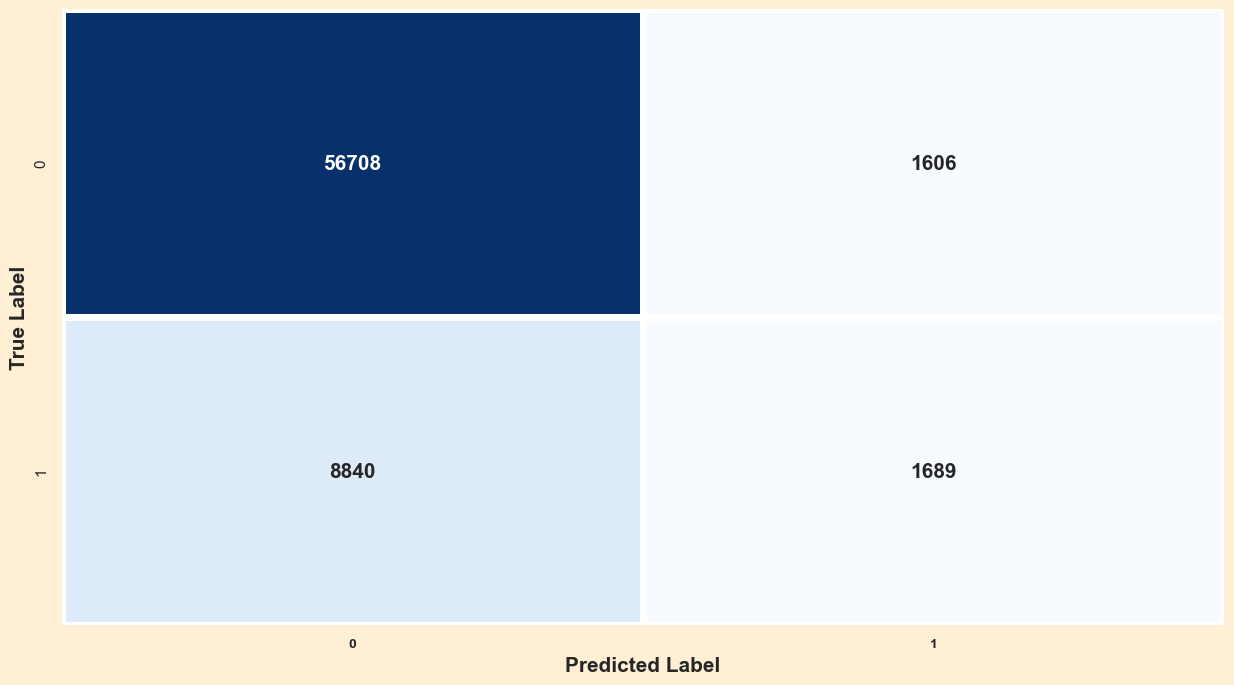

In [79]:
print(classification_report(ytest,dtm.predict(xtest)))
sns.heatmap(DF(confusion_matrix(ytest,dtm.predict(xtest)),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

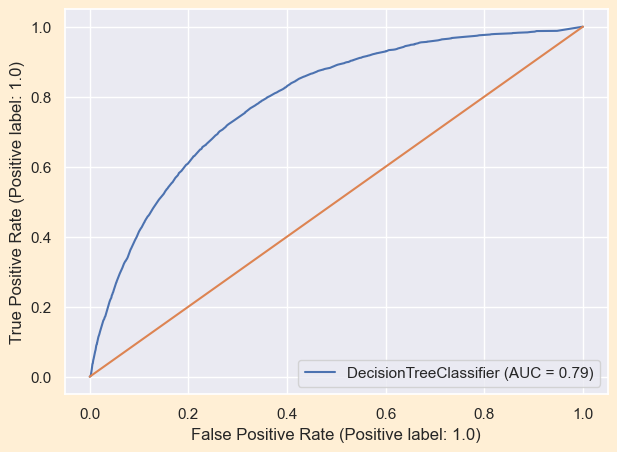

In [80]:
plt.rcParams['figure.figsize']=(7,5)
plot_roc_curve(dtm,xtest,ytest)
plt.plot([0,1],[0,1]);

## Random Forest

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    136063
         1.0       0.99      0.97      0.98     24568

    accuracy                           1.00    160631
   macro avg       1.00      0.99      0.99    160631
weighted avg       1.00      1.00      1.00    160631

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     58314
         1.0       0.47      0.17      0.25     10529

    accuracy                           0.84     68843
   macro avg       0.67      0.57      0.58     68843
weighted avg       0.81      0.84      0.81     68843



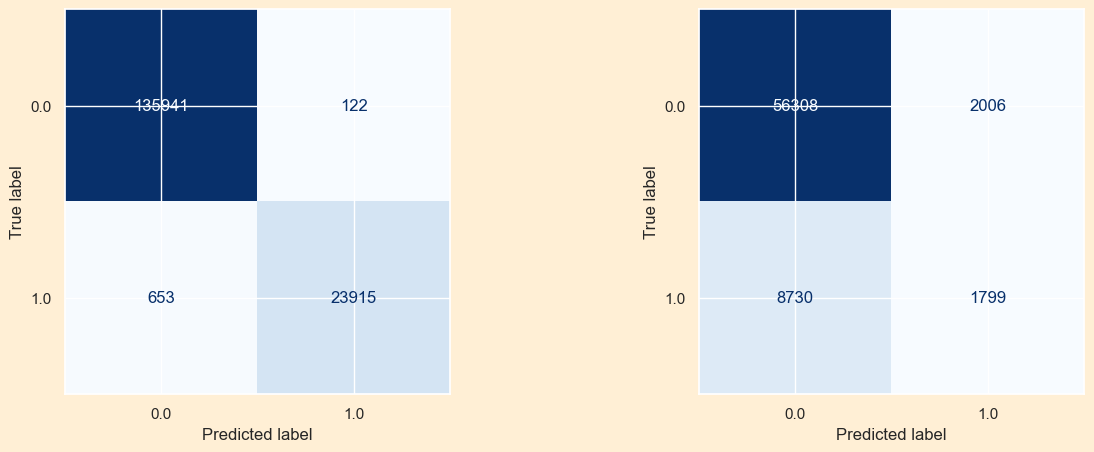

In [81]:
# without class_weight 
rf = RandomForestClassifier(random_state=10)
rfm = rf.fit(xtrain,ytrain)
rffi = DF({'Columns':xtrain.columns,'Feature_importances':rfm.feature_importances_})
rfy_pred = rfm.predict(xtrain)
rf_ytest = rfm.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,rfy_pred,ax=ax[0],cmap='Blues',values_format='d',colorbar=False)
print(classification_report(ytrain,rfy_pred))
ConfusionMatrixDisplay.from_predictions(ytest,rf_ytest,ax=ax[1],cmap='Blues',values_format='d',colorbar=False)
print(classification_report(ytest,rf_ytest))

In [82]:
scr('RandomForestClassifier', rfm, xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     58314
         1.0       0.47      0.17      0.25     10529

    accuracy                           0.84     68843
   macro avg       0.67      0.57      0.58     68843
weighted avg       0.81      0.84      0.81     68843



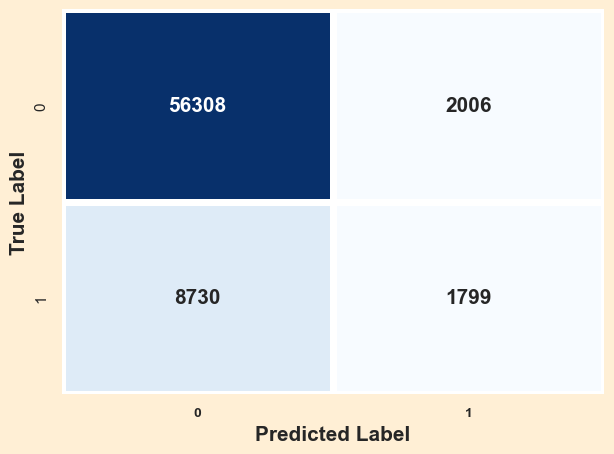

In [83]:
print(classification_report(ytest,rf_ytest))
sns.heatmap(DF(confusion_matrix(ytest,rf_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

In [84]:
##{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
rf = RandomForestClassifier(n_estimators=200,random_state=5,max_depth=11,min_samples_leaf=1,min_samples_split=2,class_weight='balanced')
rfm= rf.fit(xtrain,ytrain)
rffi = DF({'Columns':xtrain.columns,'Feature_importances':rfm.feature_importances_})
rfy_pred = rfm.predict(xtrain)
rf_ytest = rfm.predict(xtest)

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83    136063
         1.0       0.35      0.79      0.49     24568

    accuracy                           0.74    160631
   macro avg       0.65      0.76      0.66    160631
weighted avg       0.86      0.74      0.78    160631

Test
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     58314
         1.0       0.33      0.74      0.45     10529

    accuracy                           0.73     68843
   macro avg       0.63      0.73      0.64     68843
weighted avg       0.85      0.73      0.76     68843



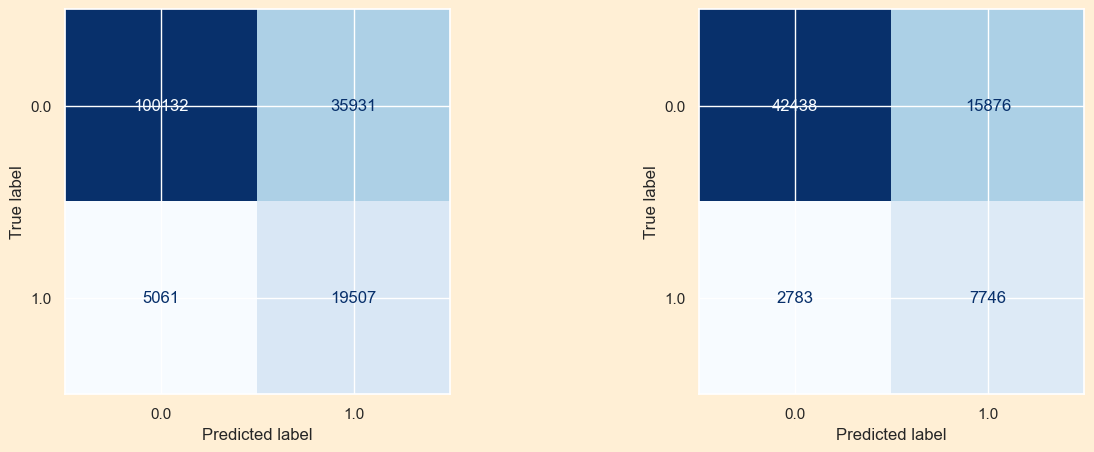

In [85]:
# tunned model
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,rfy_pred,ax=ax[0],cmap='Blues',values_format='d',colorbar=False)
print(classification_report(ytrain,rfy_pred))
ConfusionMatrixDisplay.from_predictions(ytest,rf_ytest,ax=ax[1],cmap='Blues',values_format='d',colorbar=False)
print('Test')
print(classification_report(ytest,rf_ytest))

In [86]:
scr('RandomForestClassifier (tunned)', rf, xtrain, ytrain, xtest, ytest)

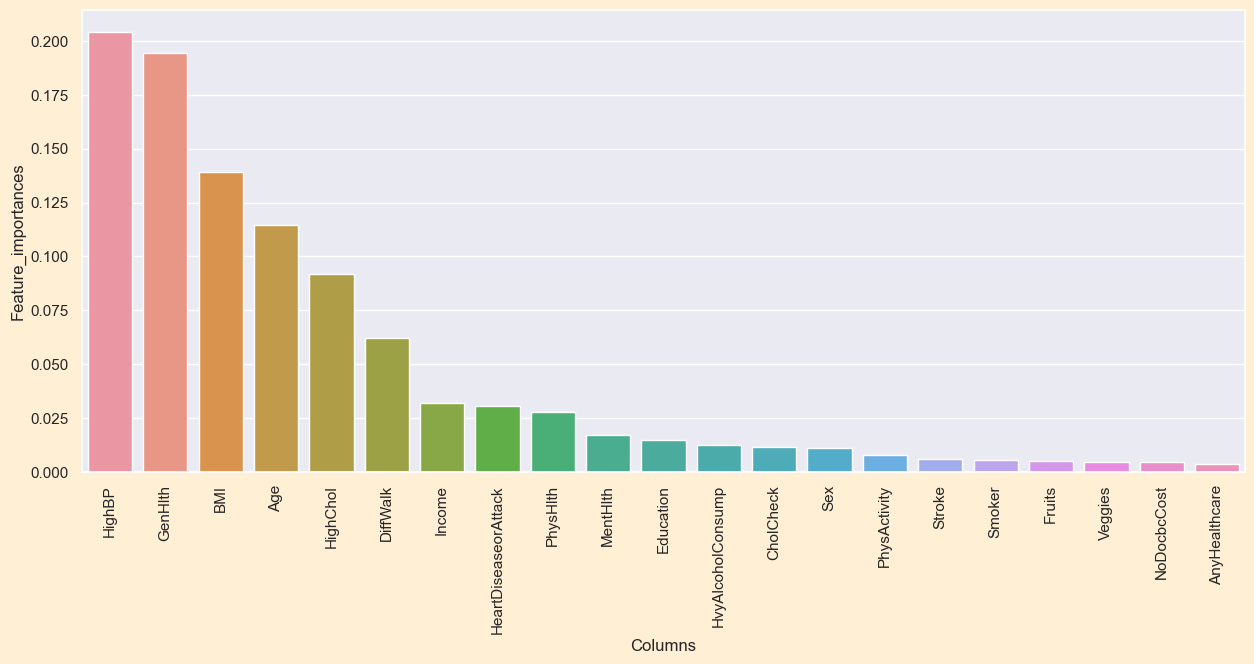

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(x='Columns',y ='Feature_importances',data=rffi.sort_values('Feature_importances',ascending=False))
plt.xticks(rotation=90);

The model is built using Random Forest Classifier. we can see the prediction of Diabetes patient has been imporved, as the recall score is 76%. Also there is improvement in the accuracy score when compared with decision tree model. where model is overfitting for the training data before tunning and after tunning the training recall and test recall varience has been reduced.

## AdaBoostclassifier

In [88]:
ab = AdaBoostClassifier(n_estimators=150,random_state=10,)
abm = ab.fit(xtrain,ytrain)
#abri = DF({'Columns':xtrain.columns,'Feature_importances':abm.feature_importances_})
ab_ytrain = abm.predict(xtrain)
ab_ytest = abm.predict(xtest)

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    136063
         1.0       0.56      0.18      0.28     24568

    accuracy                           0.85    160631
   macro avg       0.71      0.58      0.60    160631
weighted avg       0.82      0.85      0.82    160631

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58314
         1.0       0.54      0.18      0.27     10529

    accuracy                           0.85     68843
   macro avg       0.71      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843



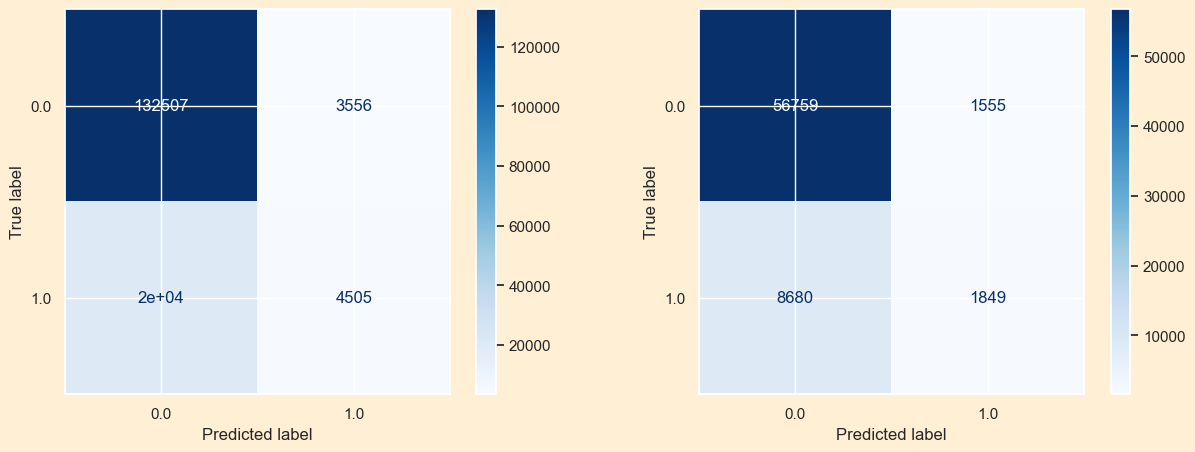

In [89]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,ab_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,ab_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,ab_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,ab_ytest))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58314
         1.0       0.54      0.18      0.27     10529

    accuracy                           0.85     68843
   macro avg       0.71      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843



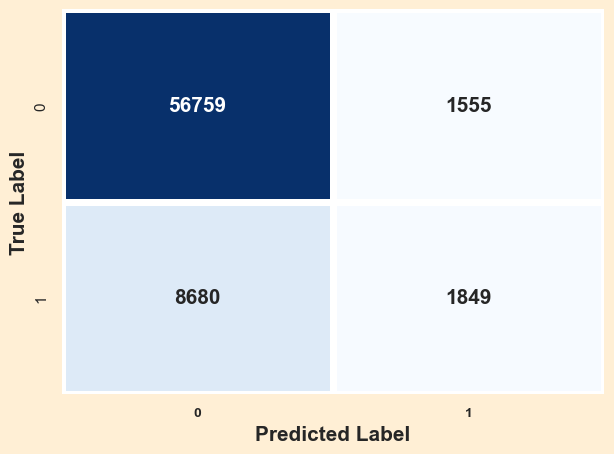

In [90]:
print(classification_report(ytest,ab_ytest))
sns.heatmap(DF(confusion_matrix(ytest,ab_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

In [91]:
scr('AdaBoostClassifier', abm, xtrain, ytrain, xtest, ytest)

## XGBClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
xg = XGBClassifier(n_estimators=250,max_depth=10,random_state=10)
xgm = xg.fit(xtrain,ytrain)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    136063
         1.0       0.99      0.75      0.85     24568

    accuracy                           0.96    160631
   macro avg       0.97      0.87      0.91    160631
weighted avg       0.96      0.96      0.96    160631

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     58314
         1.0       0.44      0.23      0.30     10529

    accuracy                           0.84     68843
   macro avg       0.66      0.59      0.61     68843
weighted avg       0.81      0.84      0.82     68843



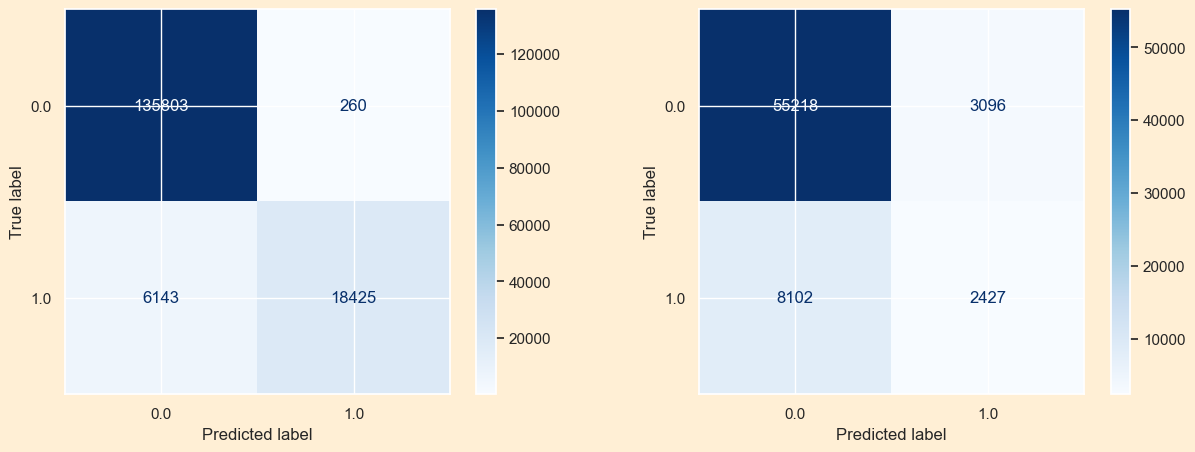

In [94]:
xg_ytrain = xgm.predict(xtrain)
xg_ytest = xgm.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,xg_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,xg_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,xg_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,xg_ytest))

In [95]:
scr('XGBClassifier', xgm, xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     58314
         1.0       0.44      0.23      0.30     10529

    accuracy                           0.84     68843
   macro avg       0.66      0.59      0.61     68843
weighted avg       0.81      0.84      0.82     68843



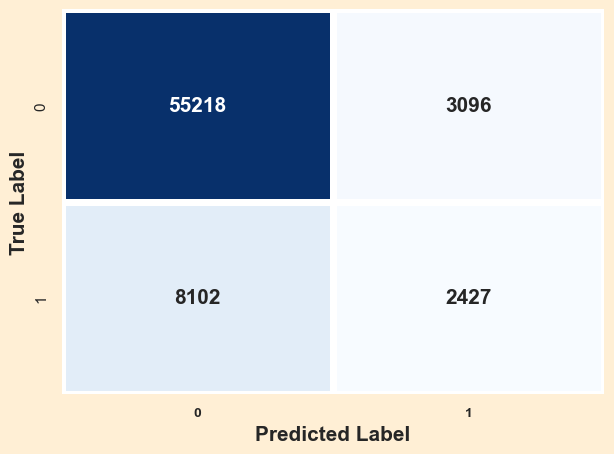

In [96]:
print(classification_report(ytest,xg_ytest))
sns.heatmap(DF(confusion_matrix(ytest,xg_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

In [97]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), xtrain, ytrain, param_name="max_depth", param_range=np.arange(1,20),cv=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


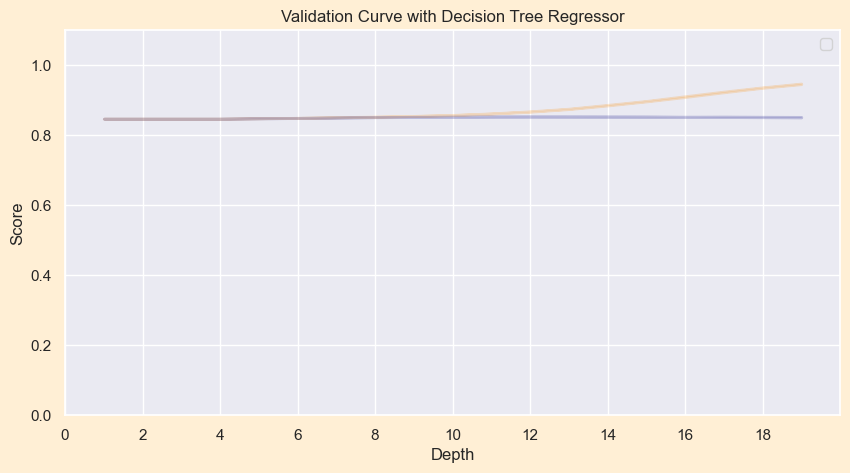

In [98]:
fig,ax = plt.subplots(figsize=(10,5))
param_range=np.arange(1,20)
plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xlim((0, 20))
ax.xaxis.set_ticks(np.arange(0, 20, 2))
lw = 2
#plt.semilogx(, train_scores_mean, label="Training score",color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## BernoulliNB

In [99]:
from sklearn.naive_bayes import BernoulliNB,CategoricalNB

In [100]:
bn = BernoulliNB()
bnm =  bn.fit(xtrain_s,ytrain)

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90    136063
         1.0       0.41      0.36      0.38     24568

    accuracy                           0.82    160631
   macro avg       0.65      0.63      0.64    160631
weighted avg       0.81      0.82      0.82    160631

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     58314
         1.0       0.40      0.35      0.37     10529

    accuracy                           0.82     68843
   macro avg       0.64      0.63      0.63     68843
weighted avg       0.81      0.82      0.82     68843



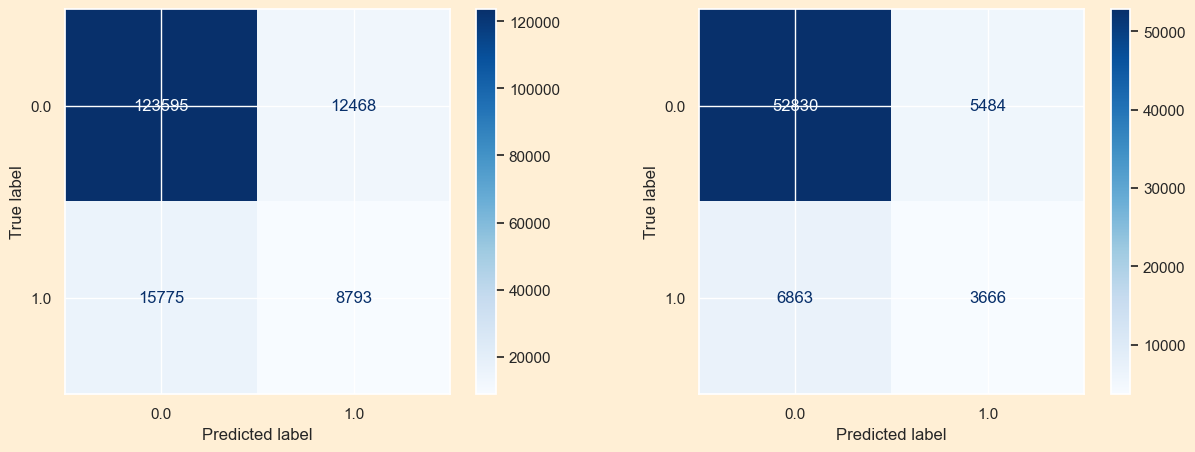

In [101]:
bn_ytrain = bnm.predict(xtrain_s)
bn_ytest = bnm.predict(xtest_s)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,bn_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,bn_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,bn_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,bn_ytest))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     58314
         1.0       0.40      0.35      0.37     10529

    accuracy                           0.82     68843
   macro avg       0.64      0.63      0.63     68843
weighted avg       0.81      0.82      0.82     68843



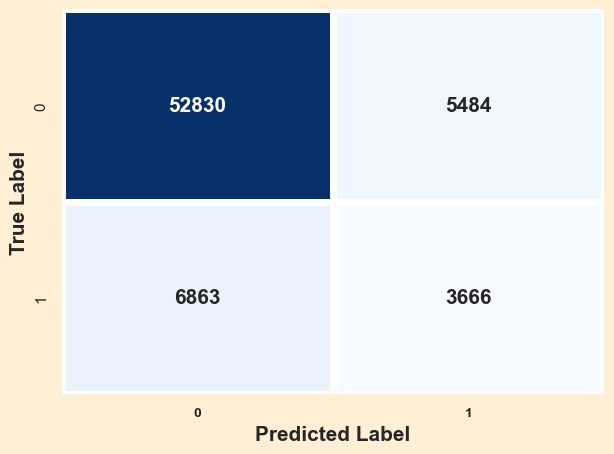

In [102]:
print(classification_report(ytest,bn_ytest))
sns.heatmap(DF(confusion_matrix(ytest,bn_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

In [103]:
scr('BernoulliNB',bnm,xtrain_s, ytrain, xtest_s, ytest)

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88    136063
         1.0       0.39      0.49      0.44     24568

    accuracy                           0.81    160631
   macro avg       0.65      0.68      0.66    160631
weighted avg       0.83      0.81      0.82    160631

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88     58314
         1.0       0.38      0.47      0.42     10529

    accuracy                           0.80     68843
   macro avg       0.64      0.67      0.65     68843
weighted avg       0.82      0.80      0.81     68843



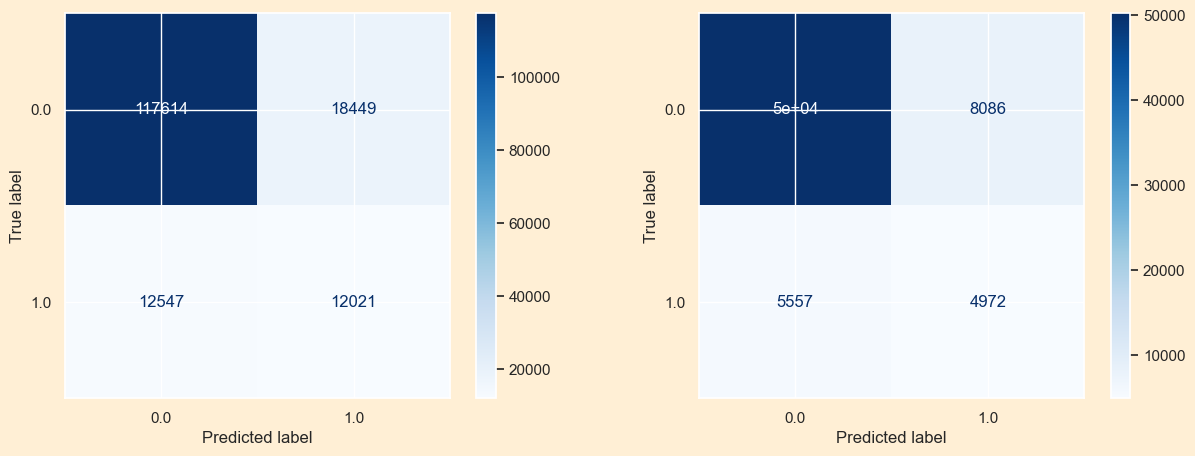

In [104]:
cnb = CategoricalNB()
cnbm = cnb.fit(xtrain,ytrain)
bn_ytrain = cnbm.predict(xtrain)
bn_ytest = cnbm.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,bn_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,bn_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,bn_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,bn_ytest))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91    136063
         1.0       0.44      0.28      0.34     24568

    accuracy                           0.84    160631
   macro avg       0.66      0.61      0.63    160631
weighted avg       0.81      0.84      0.82    160631

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     58314
         1.0       0.43      0.28      0.34     10529

    accuracy                           0.83     68843
   macro avg       0.65      0.61      0.62     68843
weighted avg       0.81      0.83      0.82     68843



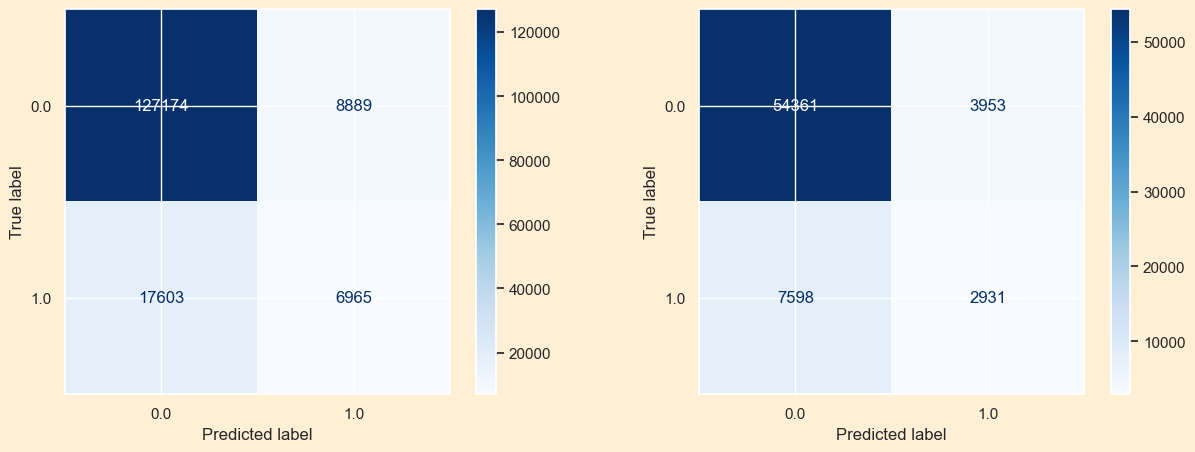

In [105]:
# list(dict(list(zip(xtrain.columns,xg.feature_importances_))[:10]).keys())
t = ['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies']
cnb = CategoricalNB()
cnbm = cnb.fit(xtrain[t],ytrain)
bn_ytrain = cnbm.predict(xtrain[t])
bn_ytest = cnbm.predict(xtest[t])
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,bn_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,bn_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,bn_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,bn_ytest))

In [106]:
from sklearn.model_selection import GridSearchCV,KFold

params = {'n_estimators':[100,150,200,250].
         'max_depth':[5,10,15],
         'learning_rate':[0.1,0.2,0.3],
         'subsample':[0.5,0.7],
         'scale_pos_weight':5.5,
         'max_delta_step'[2,4,6,8,10]}

In [107]:
dia_SMOTEN_encoded = pd.read_csv(r"S:\GitHub Projects\Using Telephonic Survey Questions to predict Diabetes Risk using Supervised Machine Learning models\Capstone (2)\Datasets\dia_SMOTEN.csv")
dia_SMOTEN_encoded.drop('Unnamed: 0',axis=1,inplace=True)
dia_SMOTEN_encoded.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     0.0       0.0        1.0    5     0.0     0.0                   0.0   
1     1.0       0.0        1.0    3     1.0     0.0                   0.0   
2     1.0       1.0        1.0    3     1.0     0.0                   0.0   
3     1.0       0.0        1.0    1     1.0     1.0                   0.0   
4     0.0       0.0        1.0    4     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0           1.0     0.0      1.0                0.0            1.0   
1           1.0     1.0      0.0                0.0            1.0   
2           1.0     1.0      1.0                0.0            1.0   
3           0.0     0.0      0.0                0.0            1.0   
4           1.0     1.0      0.0                0.0            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      2.0         1         1       0.0  0.0   3.0        6.0   
1          0.0      2.0         1         1       0.0  1.0  13.0        6.0   
2          0.0      1.0         1         1       0.0  0.0  10.0        6.0   
3          0.0      4.0         1         1       0.0  0.0  12.0        5.0   
4          0.0      3.0         1         1       0.0  1.0   5.0        4.0   

   Income  Diabetes_binary  
0     6.0              0.0  
1     4.0              0.0  
2     7.0              0.0  
3     8.0              0.0  
4     8.0              1.0

In [108]:
x_rs = dia_SMOTEN_encoded.drop('Diabetes_binary',axis=1)
y_rs = dia_SMOTEN_encoded['Diabetes_binary']

# Xg Tunning of original Data

In [109]:
from sklearn.model_selection import RandomizedSearchCV
xg = XGBClassifier(random_state=5,scale_pos_weight=5.5)
params = {'n_estimators':[100,150,200,250],
         'max_depth':[5,10,15],
         'learning_rate':[0.1,0.2,0.3],
         'subsample':[0.5,0.7],
         'max_delta_step':[2,4,6,8,10]}
rcv = RandomizedSearchCV(xg,param_distributions=params,random_state=5,cv=5,refit=True,n_iter=10,scoring='recall_macro')
rcv_xgm = rcv.fit(xtrain,ytrain)
rcv_xgm.best_params_

{'subsample': 0.7,
 'n_estimators': 150,
 'max_depth': 5,
 'max_delta_step': 10,
 'learning_rate': 0.2}

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81    136063
         1.0       0.33      0.81      0.47     24568

    accuracy                           0.72    160631
   macro avg       0.64      0.76      0.64    160631
weighted avg       0.86      0.72      0.76    160631

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80     58314
         1.0       0.32      0.77      0.45     10529

    accuracy                           0.71     68843
   macro avg       0.63      0.73      0.63     68843
weighted avg       0.85      0.71      0.75     68843



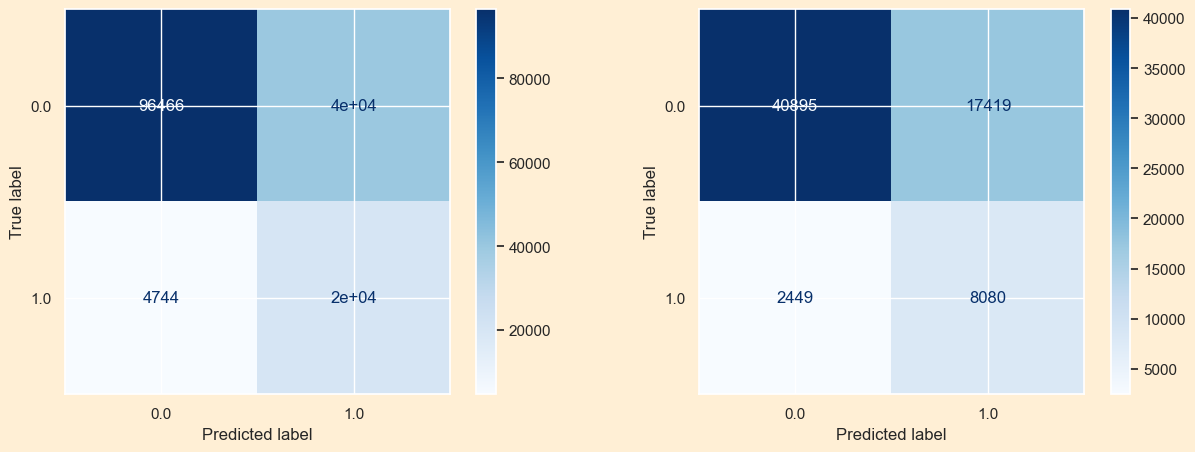

In [110]:
xg_ytrain = rcv_xgm.predict(xtrain)
xg_ytest = rcv_xgm.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,xg_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,xg_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,xg_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,xg_ytest))

In [111]:
scr('XGBClassifier (tunned)', rcv_xgm, xtrain, ytrain, xtest, ytest)

## RF on SmoteData

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97    136063
         1.0       0.96      0.98      0.97    136063

    accuracy                           0.97    272126
   macro avg       0.97      0.97      0.97    272126
weighted avg       0.97      0.97      0.97    272126

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86     58314
         1.0       0.32      0.43      0.37     10529

    accuracy                           0.77     68843
   macro avg       0.61      0.63      0.62     68843
weighted avg       0.80      0.77      0.79     68843



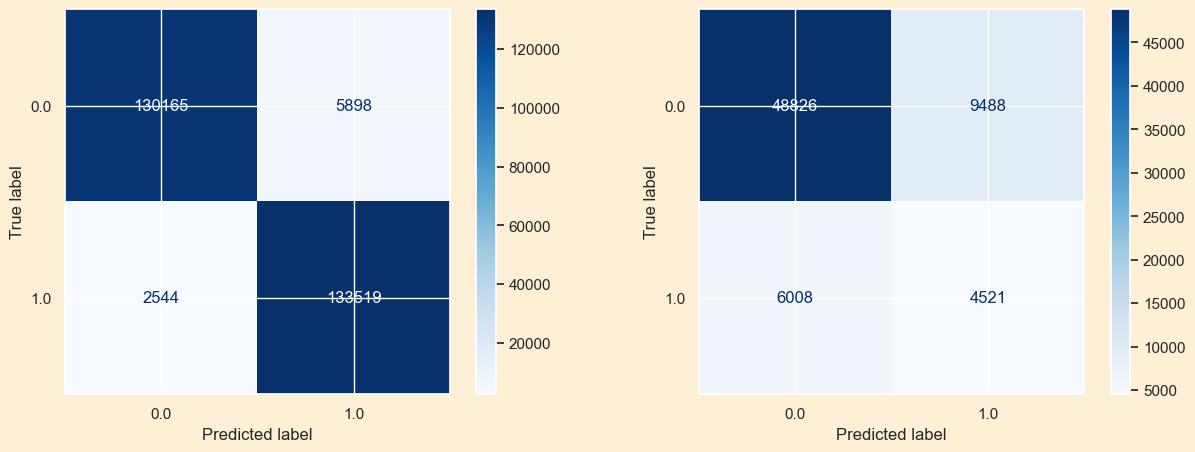

In [112]:
rf = RandomForestClassifier(random_state=5)
rfsmote = rf.fit(x_rs,y_rs)
xg_ytrain = rfsmote.predict(x_rs)
xg_ytest = rfsmote.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(y_rs,xg_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(y_rs,xg_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,xg_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,xg_ytest))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73    136063
         1.0       0.72      0.78      0.75    136063

    accuracy                           0.74    272126
   macro avg       0.74      0.74      0.74    272126
weighted avg       0.74      0.74      0.74    272126

              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     58314
         1.0       0.27      0.82      0.41     10529

    accuracy                           0.64     68843
   macro avg       0.61      0.71      0.58     68843
weighted avg       0.85      0.64      0.69     68843



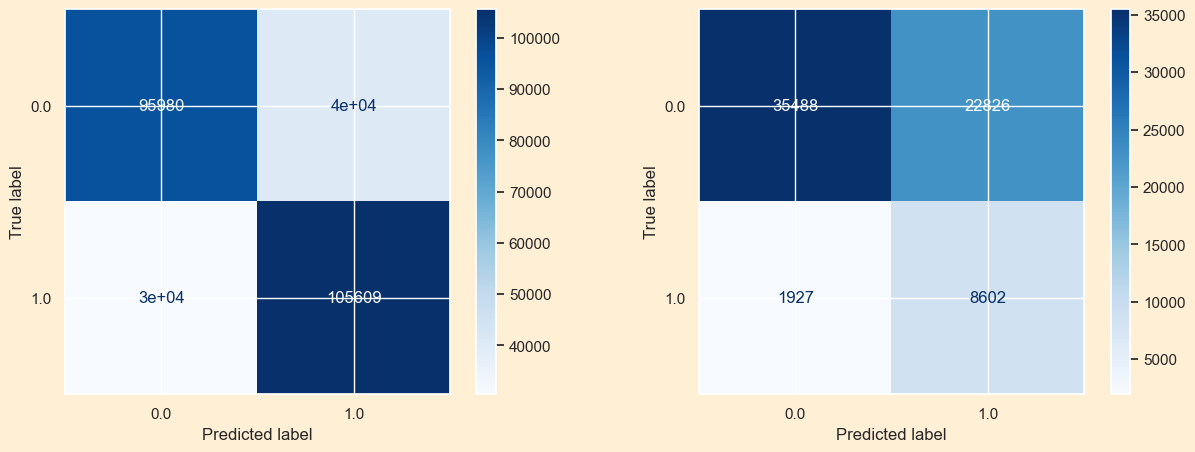

In [113]:
# Tunned
rft = RandomForestClassifier(random_state=5,n_estimators=250,min_samples_split=5,min_samples_leaf=9,max_depth=5,class_weight='balanced_subsample')
rfsmote_t = rft.fit(x_rs,y_rs)
xg_ytrain = rfsmote_t.predict(x_rs)
xg_ytest = rfsmote_t.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(y_rs,xg_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(y_rs,xg_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,xg_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,xg_ytest))

In [114]:
scr('RandomForestClassifier (Smote)', rfsmote_t, x_rs, y_rs, xtest, ytest)

              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     58314
         1.0       0.27      0.82      0.41     10529

    accuracy                           0.64     68843
   macro avg       0.61      0.71      0.58     68843
weighted avg       0.85      0.64      0.69     68843



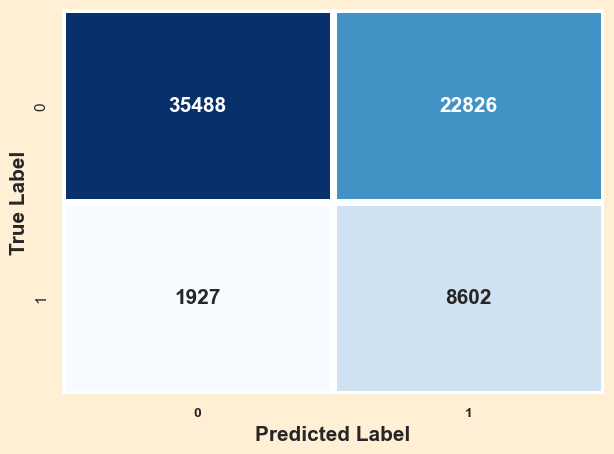

In [115]:
xg_ytest = rfsmote_t.predict(xtest)
print(classification_report(ytest,xg_ytest))
sns.heatmap(DF(confusion_matrix(ytest,xg_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

# XG of smote data 

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78    136063
         1.0       0.77      0.83      0.80    136063

    accuracy                           0.79    272126
   macro avg       0.80      0.79      0.79    272126
weighted avg       0.80      0.79      0.79    272126

              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78     58314
         1.0       0.28      0.69      0.40     10529

    accuracy                           0.68     68843
   macro avg       0.60      0.68      0.59     68843
weighted avg       0.82      0.68      0.72     68843



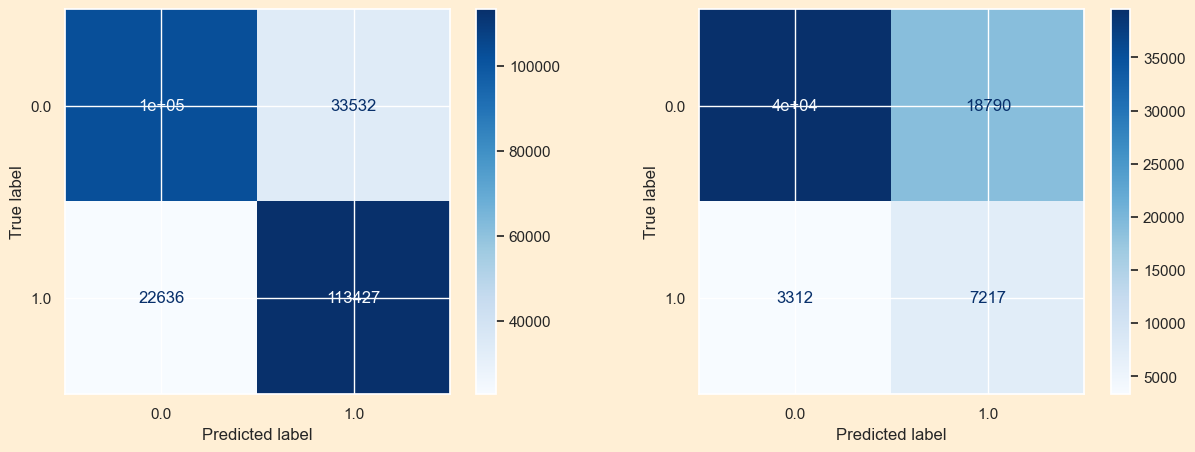

In [116]:
xg = XGBClassifier(random_state=5)
xgsmote = xg.fit(x_rs,y_rs)
xg_ytrain = xgsmote.predict(x_rs)
xg_ytest = xgsmote.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(y_rs,xg_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(y_rs,xg_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,xg_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,xg_ytest))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94    136063
         1.0       0.93      0.96      0.94    136063

    accuracy                           0.94    272126
   macro avg       0.94      0.94      0.94    272126
weighted avg       0.94      0.94      0.94    272126

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84     58314
         1.0       0.29      0.47      0.36     10529

    accuracy                           0.75     68843
   macro avg       0.59      0.63      0.60     68843
weighted avg       0.80      0.75      0.77     68843



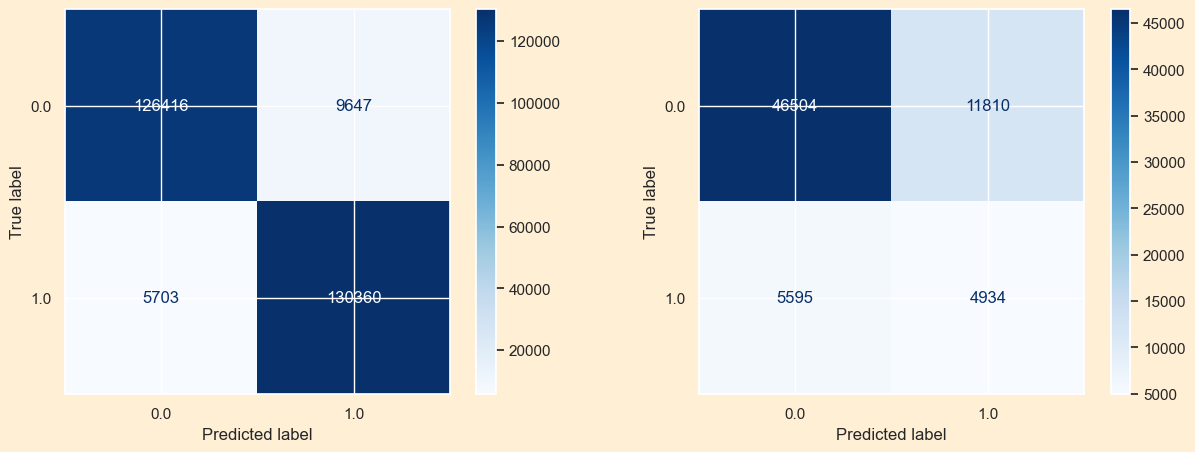

In [117]:
# tunned
xgt = XGBClassifier(random_state=5,subsample = 0.5,scale_pos_weight=1,n_estimators=100,max_depth=15,max_delta_step=4,learning_rate=0.2)
xg_smote_t = xgt.fit(x_rs,y_rs)
xg_ytrain = xg_smote_t.predict(x_rs)
xg_ytest = xg_smote_t.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(y_rs,xg_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(y_rs,xg_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,xg_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,xg_ytest))

In [118]:
scr('XGBClassifier (Smote)', xg_smote_t, x_rs, y_rs, xtest, ytest)

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84     58314
         1.0       0.29      0.47      0.36     10529

    accuracy                           0.75     68843
   macro avg       0.59      0.63      0.60     68843
weighted avg       0.80      0.75      0.77     68843



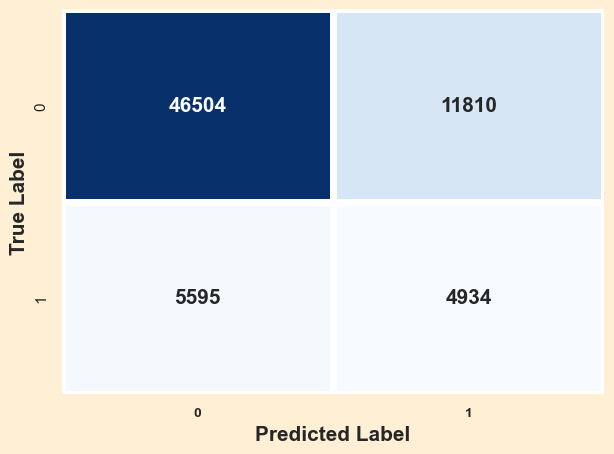

In [119]:
x = xg_smote_t.predict(xtest)
print(classification_report(ytest,x))
sns.heatmap(DF(confusion_matrix(ytest,x),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

## Stacked Model

In [120]:
base_model = [('dt',DecisionTreeClassifier(max_depth=10,random_state=5)),
              ('rf',RandomForestClassifier(random_state=5,n_estimators=250,min_samples_split=5,min_samples_leaf=9,max_depth=5,class_weight='balanced_subsample')),
              ('nb',BernoulliNB()),
              ('xg',XGBClassifier(random_state=5,subsample=0.7,n_estimators=150,max_depth=5,max_delta_step=2,learning_rate=0.2,scale_pos_weight=5.5))
              ]
meta_model = [('lr',LogisticRegression())]

In [121]:
sc = StackingClassifier(estimators=base_model,final_estimator=LogisticRegression(),cv=5,passthrough=True)
scm = sc.fit(xtrain,ytrain)

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    136063
         1.0       0.59      0.20      0.30     24568

    accuracy                           0.86    160631
   macro avg       0.73      0.59      0.61    160631
weighted avg       0.83      0.86      0.82    160631

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58314
         1.0       0.53      0.18      0.26     10529

    accuracy                           0.85     68843
   macro avg       0.70      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843



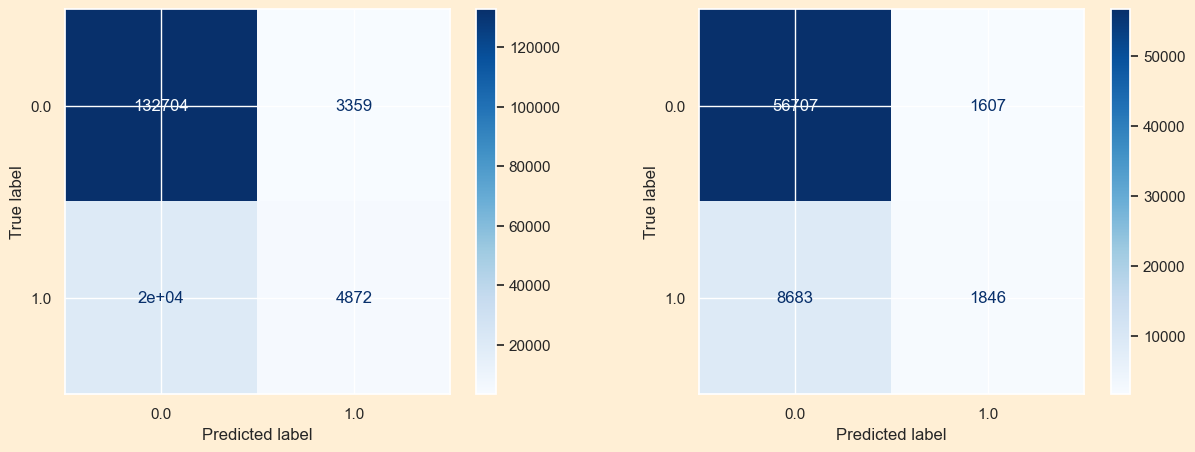

In [122]:
sc_ytrain = scm.predict(xtrain)
sc_ytest = scm.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,sc_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,sc_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,sc_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,sc_ytest))

In [123]:
sc2 = StackingClassifier(estimators=base_model,final_estimator=DecisionTreeClassifier(random_state=5,class_weight='balanced',max_depth=15),cv=5)
scm2 = sc2.fit(xtrain,ytrain)

In [124]:
sns.set(color_codes=False)

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80    136063
         1.0       0.31      0.76      0.44     24568

    accuracy                           0.71    160631
   macro avg       0.63      0.73      0.62    160631
weighted avg       0.85      0.71      0.75    160631

              precision    recall  f1-score   support

         0.0       0.93      0.69      0.80     58314
         1.0       0.30      0.73      0.43     10529

    accuracy                           0.70     68843
   macro avg       0.62      0.71      0.61     68843
weighted avg       0.84      0.70      0.74     68843



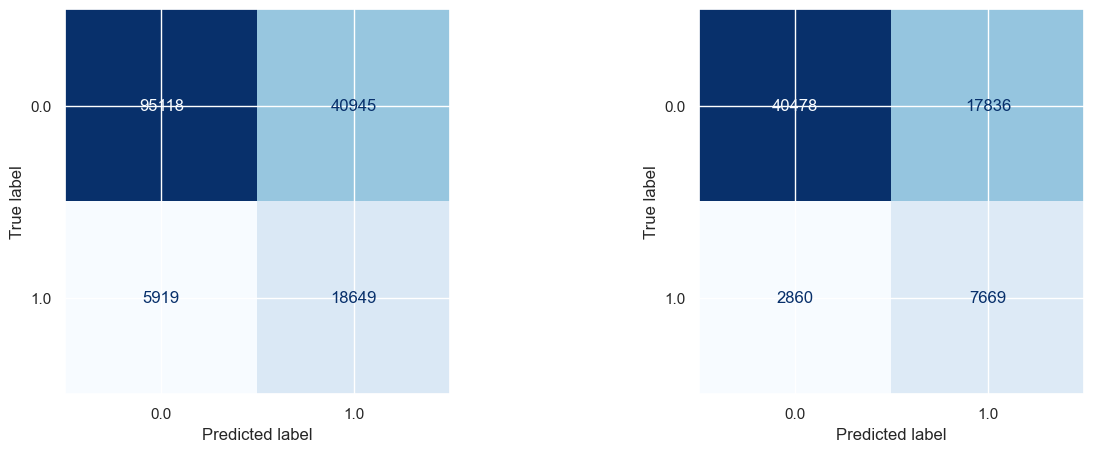

In [125]:
sc2_ytrain = scm2.predict(xtrain)
sc2_ytest = scm2.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,sc2_ytrain,ax=ax[0],cmap='Blues',colorbar=False,values_format='d')
print(classification_report(ytrain,sc2_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,sc2_ytest,ax=ax[1],cmap='Blues',colorbar=False,values_format='d')
print(classification_report(ytest,sc2_ytest))

              precision    recall  f1-score   support

         0.0       0.93      0.69      0.80     58314
         1.0       0.30      0.73      0.43     10529

    accuracy                           0.70     68843
   macro avg       0.62      0.71      0.61     68843
weighted avg       0.84      0.70      0.74     68843



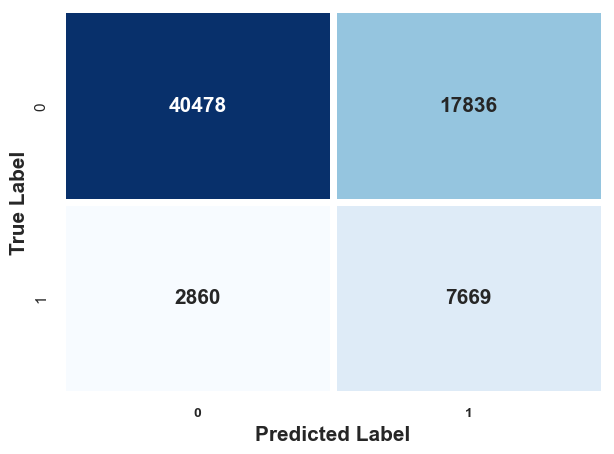

In [126]:
print(classification_report(ytest,sc2_ytest))
sns.heatmap(DF(confusion_matrix(ytest,sc2_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

In [127]:
base_model = [('dt',DecisionTreeClassifier(max_depth=10,random_state=5)),
              ('rf',RandomForestClassifier(n_estimators=200,random_state=5,max_depth=11,min_samples_leaf=1,min_samples_split=2,class_weight='balanced')),
              ('nb',BernoulliNB()),
              ('xg',XGBClassifier(random_state=5,subsample=0.7,n_estimators=150,max_depth=5,max_delta_step=2,learning_rate=0.2,scale_pos_weight=5.5))
              ]

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81    136063
         1.0       0.33      0.81      0.47     24568

    accuracy                           0.72    160631
   macro avg       0.64      0.76      0.64    160631
weighted avg       0.86      0.72      0.75    160631

              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80     58314
         1.0       0.31      0.77      0.44     10529

    accuracy                           0.70     68843
   macro avg       0.63      0.73      0.62     68843
weighted avg       0.85      0.70      0.74     68843



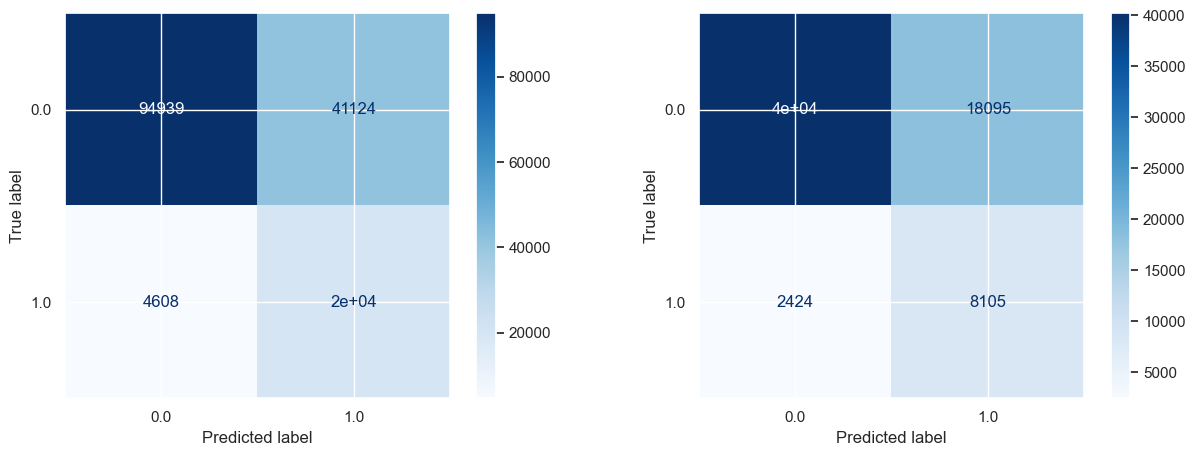

In [128]:
base_model = [('dt',DecisionTreeClassifier(max_depth=10,random_state=5)),
              ('rf',RandomForestClassifier(n_estimators=200,random_state=5,max_depth=11,min_samples_leaf=1,min_samples_split=2,class_weight='balanced')),
              ('nb',BernoulliNB()),
              ('xg',XGBClassifier(random_state=5,subsample=0.7,n_estimators=150,max_depth=5,max_delta_step=2,learning_rate=0.2,scale_pos_weight=5.5))
              ]

sc3 = StackingClassifier(estimators=base_model,final_estimator=DecisionTreeClassifier(random_state=5,class_weight='balanced',max_depth=10),cv=5)
scm3 = sc3.fit(xtrain,ytrain)
sc3_ytrain = scm3.predict(xtrain)
sc3_ytest = scm3.predict(xtest)
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,sc3_ytrain,ax=ax[0],cmap='Blues')
print(classification_report(ytrain,sc3_ytrain))
ConfusionMatrixDisplay.from_predictions(ytest,sc3_ytest,ax=ax[1],cmap='Blues')
print(classification_report(ytest,sc3_ytest))

In [129]:
scr('StackedClassifier', scm3, xtrain, ytrain, xtest, ytest)

              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77    136063
         1.0       0.76      0.83      0.79    136063

    accuracy                           0.78    272126
   macro avg       0.78      0.78      0.78    272126
weighted avg       0.78      0.78      0.78    272126

              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76     58314
         1.0       0.27      0.74      0.39     10529

    accuracy                           0.65     68843
   macro avg       0.60      0.69      0.58     68843
weighted avg       0.83      0.65      0.70     68843



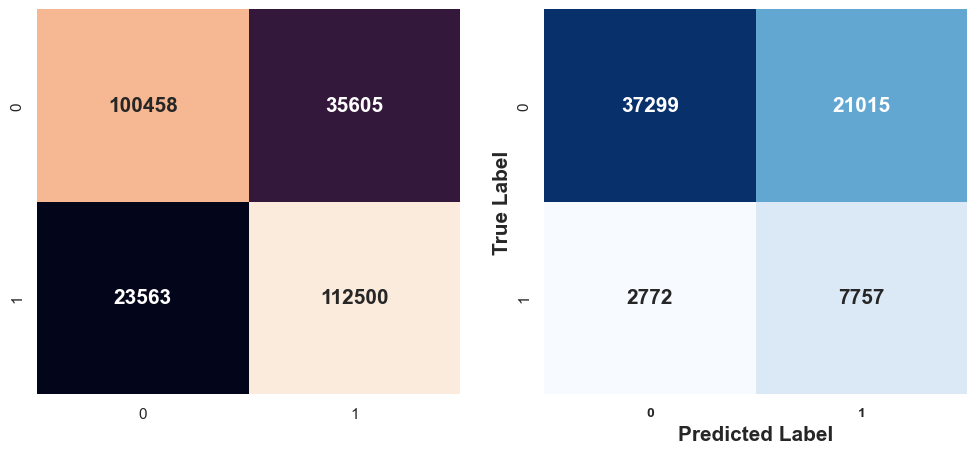

In [130]:
base_model = [('dt',DecisionTreeClassifier(max_depth=10,random_state=5)),
              ('rf',RandomForestClassifier(n_estimators=200,random_state=5,max_depth=11,min_samples_leaf=1,min_samples_split=2,class_weight='balanced')),
              ('nb',BernoulliNB()),
              ('xg',XGBClassifier(random_state=5,subsample = 0.5,scale_pos_weight=1,n_estimators=100,max_depth=15,max_delta_step=4,learning_rate=0.2))
            ]
sc_smote = StackingClassifier(estimators=base_model,final_estimator=DecisionTreeClassifier(random_state=5,class_weight='balanced',max_depth=10),cv=5)
scm_smote = sc3.fit(x_rs,y_rs)
sc3_ytrain = scm_smote.predict(x_rs)
sc3_ytest = scm_smote.predict(xtest)
print(classification_report(y_rs,sc3_ytrain))
print(classification_report(ytest,sc3_ytest))
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(DF(confusion_matrix(y_rs,sc3_ytrain),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='rocket',ax=ax[0])
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15)
sns.heatmap(DF(confusion_matrix(ytest,sc3_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',ax=ax[1])
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

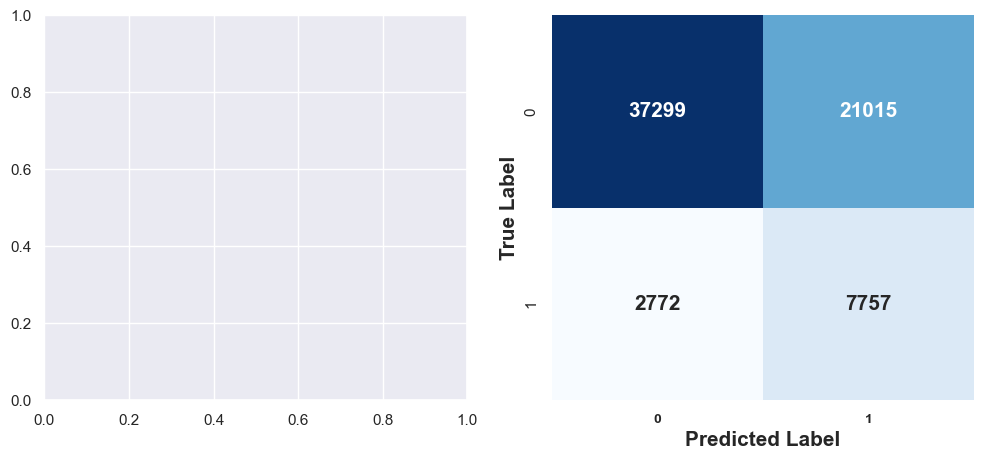

In [131]:
from sklearn.metrics import confusion_matrix
fig,ax = plt.subplots(1,2,figsize=(12,5))
#sns.heatmap(DF(confusion_matrix(ytrain, sc3_ytrain),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='rocket',ax=ax[0])
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15)
sns.heatmap(DF(confusion_matrix(ytest,sc3_ytest),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',ax=ax[1])
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

In [132]:
from sklearn.model_selection import cross_val_score
dm = {'dt':DecisionTreeClassifier(max_depth=10,random_state=5,class_weight='balanced'),
    'rf':RandomForestClassifier(n_estimators=200,random_state=5,max_depth=11,min_samples_leaf=1,min_samples_split=2,class_weight='balanced'),
    'nb':BernoulliNB(),
    'xg':XGBClassifier(random_state=5,subsample=0.7,n_estimators=150,max_depth=5,max_delta_step=2,learning_rate=0.2,scale_pos_weight=5.5)
}

def get_score(model,X,Y):
    s = cross_val_score(model,X,Y,cv=5,scoring='recall_macro')
    return s

dr = {}
for m in dm:
    r = get_score(dm[m],X,Y)
    dr.update({m:r})

In [133]:
dr['xg'].std(ddof=1),dr['rf'].std(ddof=1)

(0.0036931482183741745, 0.002184710145176635)

In [134]:
dr['xg'].mean(),dr['rf'].mean()

(0.7367141867922897, 0.7353500767609036)

In [135]:
#rm = dm['rf'].fit(xtrain,Y)
#rfy = rm.predict(X) 
#ConfusionMatrixDisplay.from_predictions(Y,rfy,ax=ax[1],cmap='Blues')
#print(classification_report(Y,rfy))

In [136]:
xg = dm['xg'].fit(xtrain,ytrain)
xgy = xg.predict(xtrain) 
print(classification_report(ytrain,xgy))

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81    136063
         1.0       0.33      0.81      0.47     24568

    accuracy                           0.72    160631
   macro avg       0.64      0.76      0.64    160631
weighted avg       0.86      0.72      0.76    160631



In [137]:
#from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,cohen_kappa_score
#global score_card
#score_card = DF(columns=['Model','Recall','Precision','f1-score','Accuracy','cohen_kappa_score','t'])
#def Score_card(name,model,xtrain = xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest):
#    global score_card
#    model = model.fit(xtrain,ytrain)
    # ytr_pred = model.predict(xtrain)
    # yts_pred = model.predict(xtest)
    # score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytrain,ytr_pred,average='macro'),2),'Precision':round(precision_score(ytrain,ytr_pred,average='macro'),2),'f1-score':round(f1_score(ytrain,ytr_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytrain,ytr_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytrain,ytr_pred),2),'t':'train'},ignore_index=True)
    # score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytest,yts_pred,average='macro'),2),'Precision':round(precision_score(ytest,yts_pred,average='macro'),2),'f1-score':round(f1_score(ytest,yts_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytest,yts_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytest,yts_pred),2),'t':'test'},ignore_index=True)
    # return

In [138]:
# def scr(name,model,xtrain = x_rs, ytrain=y_rs, xtest=xtest, ytest=ytest):
#     global score_card
#     #model = model.fit(xtrain,ytrain)
#     ytr_pred = model.predict(xtrain)
#     yts_pred = model.predict(xtest)
#     score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytrain,ytr_pred,average='macro'),2),'Precision':round(precision_score(ytrain,ytr_pred,average='macro'),2),'f1-score':round(f1_score(ytrain,ytr_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytrain,ytr_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytrain,ytr_pred),2),'t':'train'},ignore_index=True)
#     score_card = score_card.append({'Model':name,'Recall':round(recall_score(ytest,yts_pred,average='macro'),2),'Precision':round(precision_score(ytest,yts_pred,average='macro'),2),'f1-score':round(f1_score(ytest,yts_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytest,yts_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytest,yts_pred),2),'t':'test'},ignore_index=True)
#     return

In [139]:
score_card

Model  Recall  Precision  f1-score  Accuracy  \
0            RandomForestClassifier    0.99       1.00      0.99      1.00   
1            RandomForestClassifier    0.57       0.67      0.58      0.84   
2   RandomForestClassifier (tunned)    0.76       0.65      0.66      0.74   
3   RandomForestClassifier (tunned)    0.73       0.63      0.64      0.73   
4                AdaBoostClassifier    0.58       0.71      0.60      0.85   
5                AdaBoostClassifier    0.57       0.71      0.59      0.85   
6                     XGBClassifier    0.87       0.97      0.91      0.96   
7                     XGBClassifier    0.59       0.66      0.61      0.84   
8                       BernoulliNB    0.63       0.65      0.64      0.82   
9                       BernoulliNB    0.63       0.64      0.63      0.82   
10           XGBClassifier (tunned)    0.76       0.64      0.64      0.72   
11           XGBClassifier (tunned)    0.73       0.63      0.63      0.71   
12   RandomForestClassifier (Smote)    0.74       0.74      0.74      0.74   
13   RandomForestClassifier (Smote)    0.71       0.61      0.58      0.64   
14            XGBClassifier (Smote)    0.94       0.94      0.94      0.94   
15            XGBClassifier (Smote)    0.63       0.59      0.60      0.75   
16                StackedClassifier    0.76       0.64      0.64      0.72   
17                StackedClassifier    0.73       0.63      0.62      0.70   

    cohen_kappa_score      t  
0                0.98  train  
1                0.18   test  
2                0.35  train  
3                0.31   test  
4                0.22  train  
5                0.21   test  
6                0.83  train  
7                0.22   test  
8                0.28  train  
9                0.27   test  
10               0.33  train  
11               0.30   test  
12               0.48  train  
13               0.23   test  
14               0.89  train  
15               0.21   test  
16               0.32  train  
17               0.29   test

In [140]:
scr('DecisionTreeClassifier (Base)',dtm,xtrain,ytrain,xtest,ytest)


In [141]:
t = score_card.copy()
ytrain = ytrain
ytr_pred = y_pred
yts_pred = y_pred_test
score_card = score_card.append({'Model':'LogisticRegression(Base)','Recall':round(recall_score(ytrain,ytr_pred,average='macro'),2),'Precision':round(precision_score(ytrain,ytr_pred,average='macro'),2),'f1-score':round(f1_score(ytrain,ytr_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytrain,ytr_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytrain,ytr_pred),2),'t':'train'},ignore_index=True)
score_card = score_card.append({'Model':'LogisticRegression(Base)','Recall':round(recall_score(ytest,yts_pred,average='macro'),2),'Precision':round(precision_score(ytest,yts_pred,average='macro'),2),'f1-score':round(f1_score(ytest,yts_pred,average='macro'),2),'Accuracy':round(accuracy_score(ytest,yts_pred),2),'cohen_kappa_score':round(cohen_kappa_score(ytest,yts_pred),2),'t':'test'},ignore_index=True)
score_card = score_card.append({'Model':'StackedClassifier (Smote)','Recall': 0.93,'Precision': 0.93,'f1-score': 0.93,'Accuracy': 0.93,'cohen_kappa_score': 0.86,'t':'train'},ignore_index=True)
score_card = score_card.append({'Model':'StackedClassifier (Smote)','Recall': 0.61,'Precision': 0.59,'f1-score': 0.60,'Accuracy': 0.76,'cohen_kappa_score': 0.19,'t':'test'},ignore_index=True)

In [142]:
score_card

Model  Recall  Precision  f1-score  Accuracy  \
0            RandomForestClassifier    0.99       1.00      0.99      1.00   
1            RandomForestClassifier    0.57       0.67      0.58      0.84   
2   RandomForestClassifier (tunned)    0.76       0.65      0.66      0.74   
3   RandomForestClassifier (tunned)    0.73       0.63      0.64      0.73   
4                AdaBoostClassifier    0.58       0.71      0.60      0.85   
5                AdaBoostClassifier    0.57       0.71      0.59      0.85   
6                     XGBClassifier    0.87       0.97      0.91      0.96   
7                     XGBClassifier    0.59       0.66      0.61      0.84   
8                       BernoulliNB    0.63       0.65      0.64      0.82   
9                       BernoulliNB    0.63       0.64      0.63      0.82   
10           XGBClassifier (tunned)    0.76       0.64      0.64      0.72   
11           XGBClassifier (tunned)    0.73       0.63      0.63      0.71   
12   RandomForestClassifier (Smote)    0.74       0.74      0.74      0.74   
13   RandomForestClassifier (Smote)    0.71       0.61      0.58      0.64   
14            XGBClassifier (Smote)    0.94       0.94      0.94      0.94   
15            XGBClassifier (Smote)    0.63       0.59      0.60      0.75   
16                StackedClassifier    0.76       0.64      0.64      0.72   
17                StackedClassifier    0.73       0.63      0.62      0.70   
18    DecisionTreeClassifier (Base)    0.58       0.74      0.61      0.86   
19    DecisionTreeClassifier (Base)    0.57       0.69      0.58      0.85   
20         LogisticRegression(Base)    0.57       0.71      0.59      0.85   
21         LogisticRegression(Base)    0.57       0.71      0.59      0.85   
22        StackedClassifier (Smote)    0.93       0.93      0.93      0.93   
23        StackedClassifier (Smote)    0.61       0.59      0.60      0.76   

    cohen_kappa_score      t  
0                0.98  train  
1                0.18   test  
2                0.35  train  
3                0.31   test  
4                0.22  train  
5                0.21   test  
6                0.83  train  
7                0.22   test  
8                0.28  train  
9                0.27   test  
10               0.33  train  
11               0.30   test  
12               0.48  train  
13               0.23   test  
14               0.89  train  
15               0.21   test  
16               0.32  train  
17               0.29   test  
18               0.23  train  
19               0.18   test  
20               0.20  train  
21               0.20   test  
22               0.86  train  
23               0.19   test

In [143]:
t = score_card[score_card['t']=='test'].copy()
t.reset_index(drop=True,inplace=True)
t.iloc[:,:-1]

Model  Recall  Precision  f1-score  Accuracy  \
0            RandomForestClassifier    0.57       0.67      0.58      0.84   
1   RandomForestClassifier (tunned)    0.73       0.63      0.64      0.73   
2                AdaBoostClassifier    0.57       0.71      0.59      0.85   
3                     XGBClassifier    0.59       0.66      0.61      0.84   
4                       BernoulliNB    0.63       0.64      0.63      0.82   
5            XGBClassifier (tunned)    0.73       0.63      0.63      0.71   
6    RandomForestClassifier (Smote)    0.71       0.61      0.58      0.64   
7             XGBClassifier (Smote)    0.63       0.59      0.60      0.75   
8                 StackedClassifier    0.73       0.63      0.62      0.70   
9     DecisionTreeClassifier (Base)    0.57       0.69      0.58      0.85   
10         LogisticRegression(Base)    0.57       0.71      0.59      0.85   
11        StackedClassifier (Smote)    0.61       0.59      0.60      0.76   

    cohen_kappa_score  
0                0.18  
1                0.31  
2                0.21  
3                0.22  
4                0.27  
5                0.30  
6                0.23  
7                0.21  
8                0.29  
9                0.18  
10               0.20  
11               0.19

In [144]:
score_card

Model  Recall  Precision  f1-score  Accuracy  \
0            RandomForestClassifier    0.99       1.00      0.99      1.00   
1            RandomForestClassifier    0.57       0.67      0.58      0.84   
2   RandomForestClassifier (tunned)    0.76       0.65      0.66      0.74   
3   RandomForestClassifier (tunned)    0.73       0.63      0.64      0.73   
4                AdaBoostClassifier    0.58       0.71      0.60      0.85   
5                AdaBoostClassifier    0.57       0.71      0.59      0.85   
6                     XGBClassifier    0.87       0.97      0.91      0.96   
7                     XGBClassifier    0.59       0.66      0.61      0.84   
8                       BernoulliNB    0.63       0.65      0.64      0.82   
9                       BernoulliNB    0.63       0.64      0.63      0.82   
10           XGBClassifier (tunned)    0.76       0.64      0.64      0.72   
11           XGBClassifier (tunned)    0.73       0.63      0.63      0.71   
12   RandomForestClassifier (Smote)    0.74       0.74      0.74      0.74   
13   RandomForestClassifier (Smote)    0.71       0.61      0.58      0.64   
14            XGBClassifier (Smote)    0.94       0.94      0.94      0.94   
15            XGBClassifier (Smote)    0.63       0.59      0.60      0.75   
16                StackedClassifier    0.76       0.64      0.64      0.72   
17                StackedClassifier    0.73       0.63      0.62      0.70   
18    DecisionTreeClassifier (Base)    0.58       0.74      0.61      0.86   
19    DecisionTreeClassifier (Base)    0.57       0.69      0.58      0.85   
20         LogisticRegression(Base)    0.57       0.71      0.59      0.85   
21         LogisticRegression(Base)    0.57       0.71      0.59      0.85   
22        StackedClassifier (Smote)    0.93       0.93      0.93      0.93   
23        StackedClassifier (Smote)    0.61       0.59      0.60      0.76   

    cohen_kappa_score      t  
0                0.98  train  
1                0.18   test  
2                0.35  train  
3                0.31   test  
4                0.22  train  
5                0.21   test  
6                0.83  train  
7                0.22   test  
8                0.28  train  
9                0.27   test  
10               0.33  train  
11               0.30   test  
12               0.48  train  
13               0.23   test  
14               0.89  train  
15               0.21   test  
16               0.32  train  
17               0.29   test  
18               0.23  train  
19               0.18   test  
20               0.20  train  
21               0.20   test  
22               0.86  train  
23               0.19   test

In [145]:
xgf = dm['xg'].fit(xtrain,ytrain)


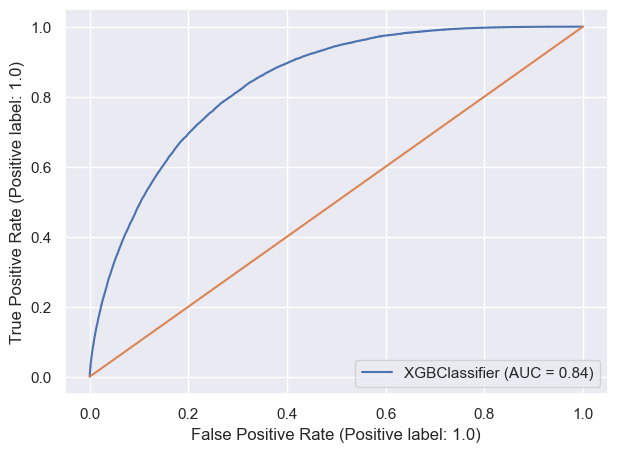

In [146]:
plt.rcParams['figure.figsize']=(7,5)
plot_roc_curve(xgf,xtrain,ytrain)
plt.plot([0,1],[0,1]);

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     58314
         1.0       0.32      0.76      0.45     10529

    accuracy                           0.71     68843
   macro avg       0.63      0.73      0.63     68843
weighted avg       0.85      0.71      0.75     68843



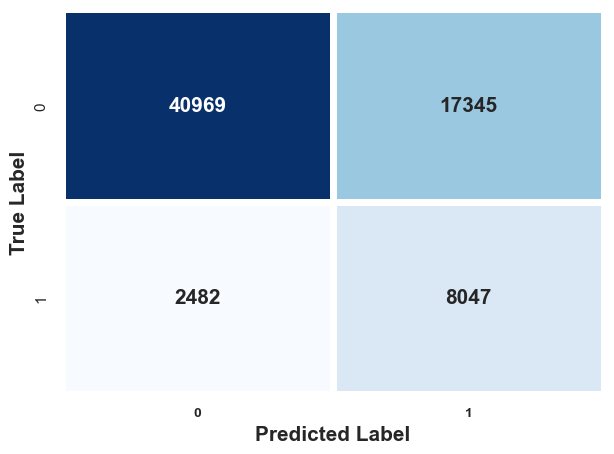

In [147]:
y_test = xgf.predict(xtest)
print(classification_report(ytest,y_test))
sns.heatmap(DF(confusion_matrix(ytest,y_test),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

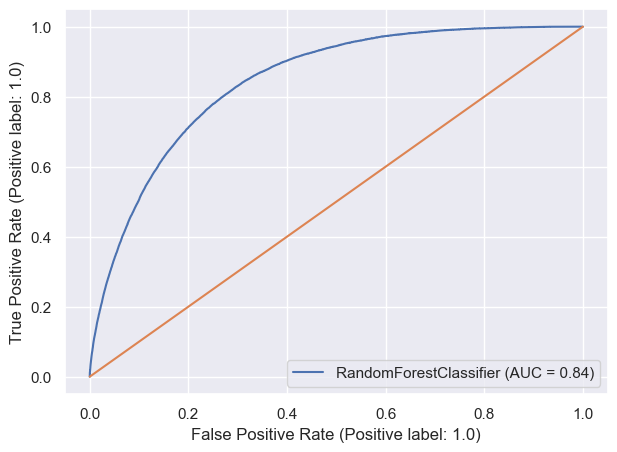

In [148]:
rff = dm['rf'].fit(xtrain,ytrain)
plt.rcParams['figure.figsize']=(7,5)
plot_roc_curve(rff,xtrain,ytrain)
plt.plot([0,1],[0,1]);

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     58314
         1.0       0.33      0.74      0.45     10529

    accuracy                           0.73     68843
   macro avg       0.63      0.73      0.64     68843
weighted avg       0.85      0.73      0.76     68843



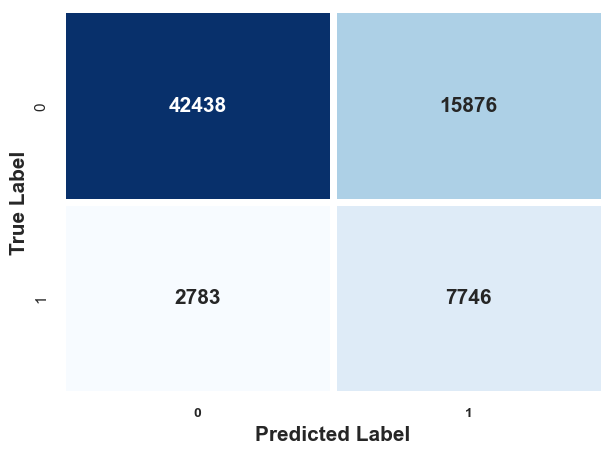

In [149]:
y_test = rff.predict(xtest)
print(classification_report(ytest,y_test))
sns.heatmap(DF(confusion_matrix(ytest,y_test),columns=[0,1],index=[0,1]),annot=True,annot_kws={'fontweight':'bold','fontsize':15},cbar=False,fmt='d',cmap='Blues',linewidths=5)
plt.xticks(fontweight='bold',fontsize=10)
plt.xlabel('Predicted Label',fontweight='bold',fontsize=15)
plt.ylabel('True Label',fontweight='bold',fontsize=15);

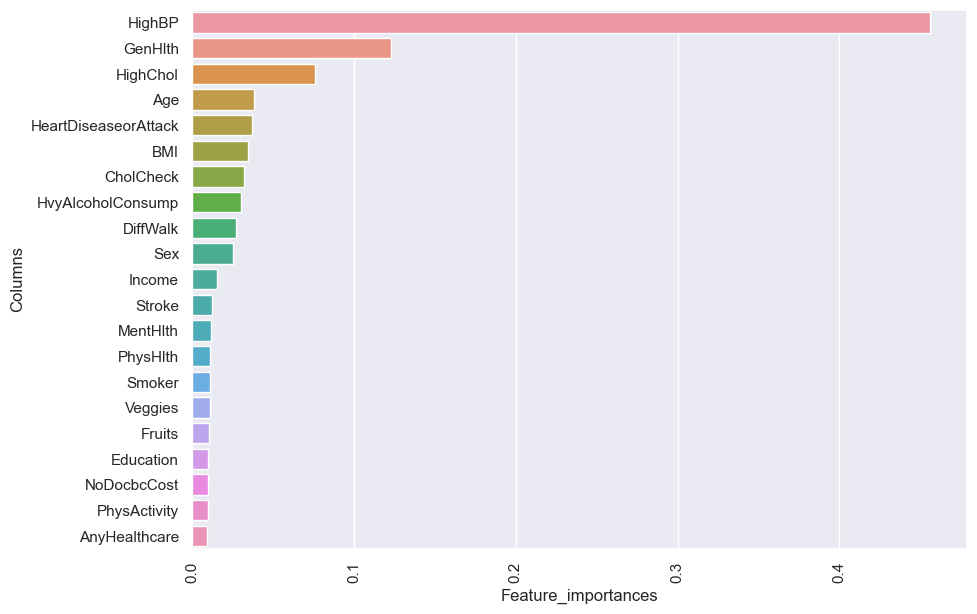

In [150]:
#xgf.feature_importances_
rffi = DF({'Columns':xtrain.columns,'Feature_importances':xgf.feature_importances_})
plt.figure(figsize=(10,7))
sns.barplot(y='Columns',x ='Feature_importances',data=rffi.sort_values('Feature_importances',ascending=False))
plt.xticks(rotation=90);

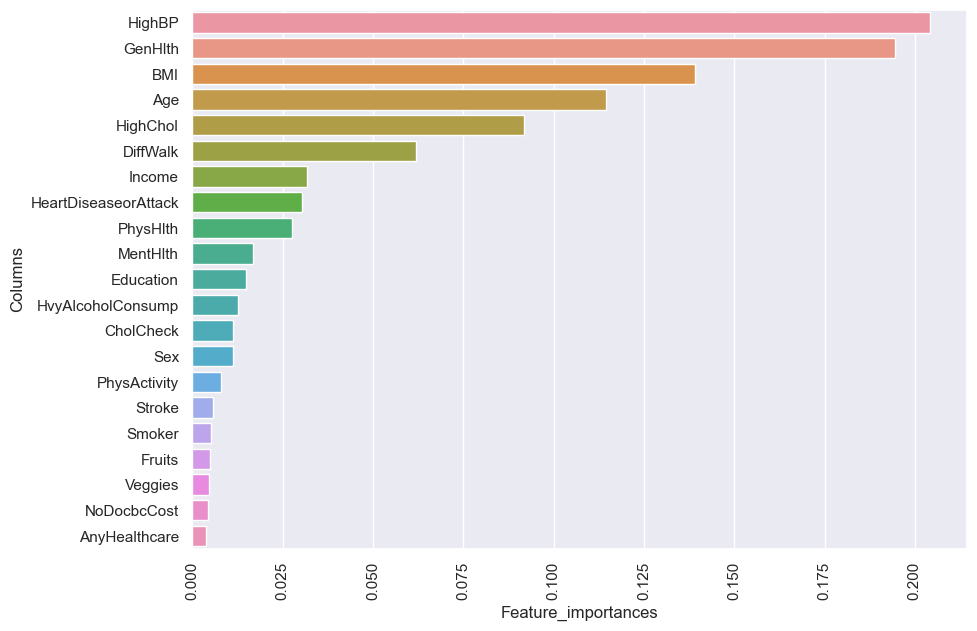

In [151]:
rffi = DF({'Columns':xtrain.columns,'Feature_importances':rff.feature_importances_})
plt.figure(figsize=(10,7))
sns.barplot(y='Columns',x ='Feature_importances',data=rffi.sort_values('Feature_importances',ascending=False))
plt.xticks(rotation=90);